## 1.pip install을 통해 설치하기

requests, 웹 크롤링에 필요한 BeautifulSoup,자연어 처리에 필요한 nltk, 복잡미묘한 한국어 텍스트에서 유용한 특성을 추출하기 위해 개발된 KoNLPy등을 설치한다.

In [1]:
!pip install requests

In [3]:
!pip install BeautifulSoup4

In [28]:
!pip install nltk 

In [70]:
!pip install KoNLPy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.4 MB 325.1 kB/s eta 0:01:00
   ---------------------------------------- 0.0/19.4 MB 279.3 kB/s eta 0:01:10
   ---------------------------------------- 0.2/19.4 MB 1.1 MB/s eta 0:00:19
   ----- ---------------------------------- 2.8/19.4 MB 13.8 MB/s eta 0:00:02
   ---------- ----------------------------- 5.2/19.4 MB 19.6 MB/s eta 0:00:01
   ------------- -------------------------- 6.5/19.4 MB 21.8 MB/s eta 0:00:01
   ------------- -------------------------- 6.7/19.4 MB 19.3 MB/s eta 0:00:01
   -------------- ------------------------- 7.0/19.4 MB 17.8 MB/s eta 0:00:01
   ----------------- ---------------------- 8.7/19.4 MB 19.8 MB/s eta 0:00:01
   ------------------------ --------------- 11.8/19.4 MB 34.4 MB/s eta 0:00:01
   ------------------------------ --------- 14.6/19.4 MB 36.4 MB/s eta 0:00:01

In [49]:
!pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 2.7/377.0 MB 56.2 MB/s eta 0:00:07
    --------------------------------------- 5.6/377.0 MB 59.2 MB/s eta 0:00:07
    --------------------------------------- 8.5/377.0 MB 60.4 MB/s eta 0:00:07
   - -------------------------------------- 11.3/377.0 MB 59.5 MB/s eta 0:00:07
   - -------------------------------------- 13.8/377.0 MB 65.2 MB/s eta 0:00:06
   - -------------------------------------- 17.0/377.0 MB 65.6 MB/s eta 0:00:06
   -- ------------------------------------- 19.9/377.0 MB 59.5 MB/s eta 0:00:07
   -- ------------------------------------- 22.9/377.0 MB 59.5 MB/s eta 0:00:06
   -- ------------------------------------- 25.8/377.0 MB 59.5 MB/s eta 0:00:06
   --- ------------------------------------ 28.5/377.0 MB 59

## 2.import 하기

코딩을 하는데 필요한 모듈들을 import 한다.

In [43]:
import requests
from bs4 import BeautifulSoup
from urllib import request as req #url을 통해 정보를 불러옴.
import re #파이썬에서 정규 표현식을 사용할 때, re을 쓴다.
import nltk #자연어 처리 모델인 nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from konlpy.tag import Okt

#본격적인 딥러닝 등을 위한 import 문이다.
import numpy as np
import tensorflow as tf #오픈 소스 기계학습 라이브러리
from tensorflow.keras.preprocessing.sequence import pad_sequences 
#pad_sequences 는 문장 등을 패딩해서 길이를 맞추는 데에 사용된다. 텍스트 데이터 처리를 할 때 사용된다.
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Attention,Input
#GRU는 LSTM과 비슷한 순환 신경망 구조이다. 시퀀스 데이터를 처리하고 정보를 장기적으로 유지하는 데 사용된다.
#Bidirectional 레이어는 양방향 순환 신경망을 구현한다. 입력 시퀀스를 순방향/역방향으로 처리해서 학습 효과를 높인다.
#Attention레이어는 입력 시퀀스의 각 단어에 가중치를 할당해서 핵심 정보에 집중할 수 있도록 돕는 레이어이다.
from tensorflow.keras.models import Sequential
#Sequential은 keras에서 신경망 모델을 구축하는 데 가장 간단한 방법 중 하나이다. 순차적으로 레이어를 쌓아서 모델을 만들 수 있다.
#keras는 파이썬으로 작성된 오픈 소스 신경망 라이브러리이다.

from tensorflow.keras.preprocessing.sequence import pad_sequences #tensorflow의 keras 패키지에서 sequence(대용량의 데이터도 효율적으로 학습 가능) 데이터를 전처리 하기 위한 pad_sequences 함수를 가져온다.
from tensorflow.keras.callbacks import ModelCheckpoint #모델 훈련 중에 모델의 상태를 저장하기 위한 콜백함수이다. 중간에 저장하면 최상의 성능을 보인 모델을 선택할 수 있다.
from tensorflow.keras.models import load_model #디스크에 저장된 훈련된 모델을 메모리로 로드할 수 있다.
from sklearn.model_selection import train_test_split #데이터를 훈련 세트와 테스트 세트로 나누기 위한 함수이다.

## 3.데이터 불러오기,크롤링 하기 (나무위키-세종대왕 문서)


url을 적어서 데이터를 불러온 다음 soup을 이용해서 자료를 긁는다.
예시로 세종대왕의 나무위키를 불러 보았다.


In [2]:
url='https://namu.wiki/w/%EC%84%B8%EC%A2%85(%EC%A1%B0%EC%84%A0)'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text = soup.get_text()

# 결과 출력
print(text)


세종(조선) - 나무위키  최근 변경  최근 토론  특수 기능              세종(조선) 
				최근 수정 시각: 2024-05-01 07:29:32  617  편집   토론  역사         분류 세종(조선)      조선 국왕 [ 펼치기 · 접기 ]초대제2대제3대제4대태조정종태종세종제5대제6대제7대제8대문종단종세조예종제9대제10대제11대제12대성종연산군중종인종제13대제14대제15대제16대명종선조광해군인조제17대제18대제19대제20대효종현종숙종경종제21대제22대제23대제24대영조정조순조헌종제25대제26대제27대철종고종순종추존왕 · 추존령 · 대립왕 · 선원선계 · 오동천호소 천호 · 대군주 · 상왕 · 왕태자 · 왕세자 · 왕비 · 대리청정 · 분조 지도자 · 비왕족 추존왕고조선 · 부여 · 원삼국 · 고구려 · 백제 · 가야 · 신라 · 탐라 · 발해 · 태봉후백제 · 후삼국 · 고려 · 대한제국 · 대한민국 임시정부 · 대한민국세종 관련 틀 [ 펼치기 · 접기 ]조선의 왕자목조 ~ 연산군 [ 펼치기 · 접기 ]추존 목조1 안천대군 · 2 안원대군 · 3 안풍대군 · 4 익조 · 5 안창대군 · 6 안흥대군추존 익조 1 함녕대군 · 2 도조 · 3 함창대군 · 4 함원대군 · 5 함천대군 · 6 함릉대군 · 7 함양대군 · 8 함성대군추존 도조1 완창대군 · 2 환조 · 3 완원대군 · 4 완천대군 · 5 완성대군추존 환조1 완풍대군 · 2 영성대군 · 3 태조 · 4 의안대군태조1 진안대군 · 2 정종(영안군) · 3 익안대군 · 4 회안대군 ·5 태종(정안공) ·  6 덕안대군 · 7 무안대군 · 8 폐세자(의안대군)정종1 의평군 · 2 순평군 · 3 금평군 · 4 선성군 · 5 종의군 · 6 진남군 · 7 수도군 · 8 임언군 · 9 석보군 · 10 덕천군 · 11 임성군 · 12 도평군 · 13 장천군 · 14 정석군 · 15 무림군태종1 폐세자(양녕대군) · 2 효령대군 · 3 세종(충녕대군) · 6 성녕대군 · 4 경녕군 · 5 

### 데이터 잔가지 치기

쓸모 없는 데이터들은 모두 삭제한다.


In [3]:
#한글/숫자만 남기고 나머지를 제거한다.
#숫자는 년도나 생년월일을 이야기할 때 필요하다.

def remove_non_korean(text):
    korean_text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣0-9\s]', '', text)
    return korean_text


#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.

cleaned_text = remove_non_korean(text)
print(cleaned_text)


세종조선  나무위키  최근 변경  최근 토론  특수 기능              세종조선 
				최근 수정 시각 20240501 072932  617  편집   토론  역사         분류 세종조선      조선 국왕  펼치기  접기 초대제2대제3대제4대태조정종태종세종제5대제6대제7대제8대문종단종세조예종제9대제10대제11대제12대성종연산군중종인종제13대제14대제15대제16대명종선조광해군인조제17대제18대제19대제20대효종현종숙종경종제21대제22대제23대제24대영조정조순조헌종제25대제26대제27대철종고종순종추존왕  추존령  대립왕  선원선계  오동천호소 천호  대군주  상왕  왕태자  왕세자  왕비  대리청정  분조 지도자  비왕족 추존왕고조선  부여  원삼국  고구려  백제  가야  신라  탐라  발해  태봉후백제  후삼국  고려  대한제국  대한민국 임시정부  대한민국세종 관련 틀  펼치기  접기 조선의 왕자목조  연산군  펼치기  접기 추존 목조1 안천대군  2 안원대군  3 안풍대군  4 익조  5 안창대군  6 안흥대군추존 익조 1 함녕대군  2 도조  3 함창대군  4 함원대군  5 함천대군  6 함릉대군  7 함양대군  8 함성대군추존 도조1 완창대군  2 환조  3 완원대군  4 완천대군  5 완성대군추존 환조1 완풍대군  2 영성대군  3 태조  4 의안대군태조1 진안대군  2 정종영안군  3 익안대군  4 회안대군 5 태종정안공   6 덕안대군  7 무안대군  8 폐세자의안대군정종1 의평군  2 순평군  3 금평군  4 선성군  5 종의군  6 진남군  7 수도군  8 임언군  9 석보군  10 덕천군  11 임성군  12 도평군  13 장천군  14 정석군  15 무림군태종1 폐세자양녕대군  2 효령대군  3 세종충녕대군  6 성녕대군  4 경녕군  5 함녕군  7 온녕군  8 근녕군  9 혜령군  10 희령군  11 후령군  12 익녕군세종1 문종  2 세조수양대군  3 안평대군  4 임영대군  5 광평대군  7 금성대군  9 평원대

### 다른 여러가지 문서들 크롤링하기

한 사이트의 문서들만을 가지고 챗봇을 만드는 것은 매우 위험하다.<br>
그렇기 때문에, 다른 문서들을 가지고 크롤링을 실시한다.<br>
코드는 위의 코드들을 그대로 따른다.


### 다른 웹사이트 문서(1)-위키피디아

url-https://ko.wikipedia.org/wiki/%EC%84%B8%EC%A2%85

In [4]:
url='https://ko.wikipedia.org/wiki/%EC%84%B8%EC%A2%85'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text1 = soup.get_text()

# 결과 출력
#print(text1)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text1 = remove_non_korean(text1)
print(cleaned_text1)





세종  위키백과 우리 모두의 백과사전





































본문으로 이동







주 메뉴





주 메뉴
사이드바로 이동
숨기기



		둘러보기
	


대문최근 바뀜요즘 화제임의의 문서로기부





		사용자 모임
	


사랑방사용자 모임관리 요청





		편집 안내
	


소개도움말정책과 지침질문방



















검색











검색





























계정 만들기

로그인








개인 도구





 계정 만들기 로그인





		로그아웃한 편집자를 위한 문서 더 알아보기



기여토론




























목차
사이드바로 이동
숨기기




처음 위치





1생애



생애 하위섹션 토글하기





11왕자 시절





111탄생과 봉작







112양녕대군과의 갈등







113세자 책봉과 즉위











2치세



치세 하위섹션 토글하기





21대외 정책





211공녀와 금은 조공 중지







212대마도 정벌







2134군 6진 개척









22훈민정음 창제







23재상 등용과 국정 분담





231의정부 서사제 실시









24과학의 발전





241천문과 역법







242금속활자와 인쇄술







243도량형 통일  총통제작









25품계가 아닌 왕실 의례에 따른 상하를 따져 관복을 제도화







26신분별로 집의 크기와 세부치장을 제한







27문물의 발전





271음악 정비  편경 제작







272서적 편찬







273문물 정비







274법전 정비







275토성인 도성의 석성으로 개축







276형옥제도 확립







277공법 제정









28애민정책







29불교에 귀의







210건강 

### 다른 웹사이트 문서(2)-한국민족문화대백과사전

url-https://encykorea.aks.ac.kr/Article/E0029857

In [5]:
url='https://encykorea.aks.ac.kr/Article/E0029857'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text2 = soup.get_text()

# 결과 출력
#print(text2)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text2 = remove_non_korean(text2)
print(cleaned_text2)


















세종  한국민족문화대백과사전

























본문 바로가기







의견문의
이용 안내



































분야



경제산업

경제
교통
산업
통신



과학

과학기술
동물
식물
의약학



교육


문학

고전산문
고전시가
구비문학
한문학
현대문학



사회

가족
사회구조
촌락



생활

민속인류
식생활
의생활
주생활



언론출판

언론방송
출판



언어

언어문자



역사

선사문화
고대사
고려시대사
조선시대사
근대사
현대사



예술체육

건축
공예
국악
대중음악
무용
서예
연극
영화
조각
체육
현대음악
회화



정치법제

국방
법제행정
외교
정치



종교철학

개신교
대종교
도교
민간신앙
불교
신종교
원불교
유교
천도교
천주교



지리

인문지리
자연지리



북한




유형


인물


지명


개념


유물


단체


작품


문헌


사건


물품


제도


놀이


유적


의식행사


동식물





전체메뉴




















세종















목차


메뉴 접기




정의
개설
세종의 즉위 과정
세종의 업적

1 유교정치의 기틀 마련
2 편찬사업의 융성
3 훈민정음의 창제
4 과학기술의 발전과 기술서적의 편찬
5 법전의 정비
6 불교에 대한 시책


세종 치세의 역사적 의의
상훈과 추모
참고문헌


관련 정보


관련 항목
관련 미디어













글자 크기





의견 제시






 복사



페이스북 공유



트위터 공유







						세종
					









									세종대왕 동상
								





조선시대사

인물


조선의 제4대재위 1418년1450년 왕




이칭


자
원정


시호
장헌



인물전통 인물


성별

남성													


출생 연도

1397년태조 6													


사망 연도



### 다른 웹사이트 문서(3)-우리역사넷

url-http://contents.history.go.kr/mobile/kc/view.do?levelId=kc_n305800&code=kc_age_30

In [6]:
url='http://contents.history.go.kr/mobile/kc/view.do?levelId=kc_n305800&code=kc_age_30'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text3 = soup.get_text()

# 결과 출력
#print(text3)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text3 = remove_non_korean(text3)
print(cleaned_text3)







우리역사넷






























메뉴

연호
검색







콘텐츠 내 검색


















교과서 속 우리역사
역대 국사교과서
재미있는 초등역사


교양 우리 역사
신편 한국사
한국문화사
주제로 본 한국사
사료로 본 한국사
영문 한국사
독도 교육자료


영상이미지 속 우리역사
한국사 이미지 자료

영상 책 이야기
영상 문화예술 이야기


우리 역사 나침반
오늘의 역사연표
한국사 연대기교과서 용어 해설
역사 지리


소개
사이트 소개
자료별 소개
이용안내
공지사항
오류신고


저작권 정책
데이터 개방
개인정보 처리방침
















한국사 연대기
조선
세종










	               세종
왕조의 문화적 기틀을 세우다


	
                    	1397년태조 5  1450년세종 32






											세종대왕 표준영정


												전통문화포털문화체육관광부 한국문화정보원





1
						출생 세자 책봉 즉위

세종 1397년1450은 조선의 제4대 국왕으로 재위 기간은 14181450년이다 이름은 도이고 자는 원정이며 세종은 묘호이다
세종은 태종조선과 원경왕후 민씨의 셋째 아들로 1397년태조 6 4월 10일 한양 준수방의 태종 사저에서 출생하였다 1408년태종 8 2월 11일 충녕군에 봉해졌고
				 1412년태종 12 5월 3일에 다시 충녕대군으로 진봉되었다
				
			
1418년태종 18 6월 3일 세자에 책봉되었으며
				 같은 해 8월 10일 태종의 양위를 받아 경복궁 근정전에서 즉위하였다
				
			
충녕군 시절이던 1408년태종 8 2월 16일에 청송 심씨 심온의 딸과 혼인했는데 바로 소헌왕후이다
				
			
처음에 태종은 1402년태종 2 4월 맏아들 제를 원자로 책봉했다가 2년 후인 1404년태종 4 세자로 책봉했는데
				 그가 바로 양녕대군이다 태종은 태조 이성계 가 막내아들 방석을 세

### 다른 웹사이트 문서(4)-세종대왕의 업적

url-https://namu.wiki/w/%EC%84%B8%EC%A2%85(%EC%A1%B0%EC%84%A0)/%EC%97%85%EC%A0%81


In [7]:
url='https://namu.wiki/w/%EC%84%B8%EC%A2%85(%EC%A1%B0%EC%84%A0)/%EC%97%85%EC%A0%81'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text4 = soup.get_text()

# 결과 출력
#print(text4)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text4 = remove_non_korean(text4)
print(cleaned_text4)


세종조선업적  나무위키  최근 변경  최근 토론  특수 기능              세종조선업적 
				최근 수정 시각 20240417 061051  30  편집   토론  역사         분류 세종조선        상위 문서 세종조선세종관련 문서  펼치기  접기 일생생애관련 문서업적  비판과 반론  특이한 기록들  가족  영릉  세종대왕급 구축함  대중매체에서업적국방 분야 4군 6진 배치  대마도 정벌  신기전 농업 분야 농사직설 편찬교육 분야 집현전 설립  고려사 편찬  훈민정음 반포음악 분야 정간보 국악 악보 완성과학 분야 앙부일구 물시계 자격루 등 발명조선 국왕 관련 문서   펼치기  접기 태조생애  건원릉  왕씨 몰살  이성계 여진족설  조선태조어진  전어도  종계변무  평가  여담  대중매체  가족관계태종생애  평가  헌릉  태종우  일화  가족관계  대중매체세종업적  비판과 반론  특이한 기록들  한양 대화재  가족관계  영릉  대중매체세조생애  평가  광릉  어진  대중매체  기타예종민수사옥  남이의 옥성종생애  선릉연산군생애  연산군묘선조평가  목릉광해군생애  대동법  평가  광해군묘  대중매체인조평가  장릉  대중매체영조생애  인물성격  원릉  대중매체정조생애  정조 어찰첩 정조 한글어찰첩  가계  정조 어진  건릉  대중매체순조홍경래의 난  세도정치철종생애  임술농민봉기고종생애  즉위 배경  홍릉  평가  여담순종유릉  대중매체1 개요2 역사3 분야별 업적31 농업32 교육33 복지34 음악35 언어학36 역사37 수학 과학38 군사4 과로5 기타1 개요편집세종대왕의 업적을 정리한 문서2 역사편집임금이 영응 대군 집 동별궁에서 훙하였다 처음에 영응 대군 집을 지을 때 명하여 한 궁을 따로 집 동편에 세워서 옮겨 거처할 곳을 준비하였다  임금은 슬기롭고 도리에 밝으매 마음이 밝고 뛰어나게 지혜롭고 인자하고 효성이 지극하며 지혜롭고 용감하게 결단하며 합에 있을 때부터 배우기를 좋아하되 게으르지 않아 손에서 책이 떠나지 않았다 일찍이 여러

### 다른 웹사이트 문서(5)-세종대왕에 대한 비판과 반론

url-https://namu.wiki/w/%EC%84%B8%EC%A2%85(%EC%A1%B0%EC%84%A0)/%EB%B9%84%ED%8C%90%EA%B3%BC%20%EB%B0%98%EB%A1%A0

In [8]:
url='https://namu.wiki/w/%EC%84%B8%EC%A2%85(%EC%A1%B0%EC%84%A0)/%EB%B9%84%ED%8C%90%EA%B3%BC%20%EB%B0%98%EB%A1%A0'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text5 = soup.get_text()

# 결과 출력
#print(text5)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text5 = remove_non_korean(text5)
print(cleaned_text5)


세종조선비판과 반론  나무위키  최근 변경  최근 토론  특수 기능              세종조선비판과 반론 
				최근 수정 시각 20240415 195421  18  편집   토론  역사         분류 세종조선인물에 대한 평가        상위 문서 세종조선세종관련 문서  펼치기  접기 일생생애관련 문서업적  비판과 반론  특이한 기록들  가족  영릉  세종대왕급 구축함  대중매체에서업적국방 분야 4군 6진 배치  대마도 정벌  신기전 농업 분야 농사직설 편찬교육 분야 집현전 설립  고려사 편찬  훈민정음 반포음악 분야 정간보 국악 악보 완성과학 분야 앙부일구 물시계 자격루 등 발명조선 국왕 관련 문서   펼치기  접기 태조생애  건원릉  왕씨 몰살  이성계 여진족설  조선태조어진  전어도  종계변무  평가  여담  대중매체  가족관계태종생애  평가  헌릉  태종우  일화  가족관계  대중매체세종업적  비판과 반론  특이한 기록들  한양 대화재  가족관계  영릉  대중매체세조생애  평가  광릉  어진  대중매체  기타예종민수사옥  남이의 옥성종생애  선릉연산군생애  연산군묘선조평가  목릉광해군생애  대동법  평가  광해군묘  대중매체인조평가  장릉  대중매체영조생애  인물성격  원릉  대중매체정조생애  정조 어찰첩 정조 한글어찰첩  가계  정조 어진  건릉  대중매체순조홍경래의 난  세도정치철종생애  임술농민봉기고종생애  즉위 배경  홍릉  평가  여담순종유릉  대중매체1 개요2 왕자들의 활동21 반론3 대명 사대 외교를 위한 공물 수급의 폐단31 반론4 부민고소금지법41 반론5 노비종모법51 반론6 사민 정책61 반론7 화폐개혁8 고려 문화재 훼손81 반론1 개요편집조선시대의 성군으로 평가받는 위인 세종대왕에 대한 세부적인 의견들을 종합한 문서이다세종은 많은 업적과 애민정신을 인정받아 오늘날 세종대왕이라 불리며 성군으로 추앙받는 군주임에는 틀림없으나 몇몇 개별적인 사안에 대해서는 의견이 갈리기도 한다20세기만 하더라도 세종에 대한 객관적인 평가

### 다른 웹사이트 문서(6)-세종대왕에 대한 특이한 기록들

url-https://namu.wiki/w/%EC%84%B8%EC%A2%85(%EC%A1%B0%EC%84%A0)/%ED%8A%B9%EC%9D%B4%ED%95%9C%20%EA%B8%B0%EB%A1%9D%EB%93%A4

In [9]:
url='https://namu.wiki/w/%EC%84%B8%EC%A2%85(%EC%A1%B0%EC%84%A0)/%ED%8A%B9%EC%9D%B4%ED%95%9C%20%EA%B8%B0%EB%A1%9D%EB%93%A4'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text6 = soup.get_text()

# 결과 출력
#print(text6)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text6 = remove_non_korean(text6)
print(cleaned_text6)


세종조선특이한 기록들  나무위키  최근 변경  최근 토론  특수 기능              세종조선특이한 기록들 
				최근 수정 시각 20240330 010750  10  편집   토론  역사         분류 세종조선        상위 문서 세종조선세종관련 문서  펼치기  접기 일생생애관련 문서업적  비판과 반론  특이한 기록들  가족  영릉  세종대왕급 구축함  대중매체에서업적국방 분야 4군 6진 배치  대마도 정벌  신기전 농업 분야 농사직설 편찬교육 분야 집현전 설립  고려사 편찬  훈민정음 반포음악 분야 정간보 국악 악보 완성과학 분야 앙부일구 물시계 자격루 등 발명조선 국왕 관련 문서   펼치기  접기 태조생애  건원릉  왕씨 몰살  이성계 여진족설  조선태조어진  전어도  종계변무  평가  여담  대중매체  가족관계태종생애  평가  헌릉  태종우  일화  가족관계  대중매체세종업적  비판과 반론  특이한 기록들  한양 대화재  가족관계  영릉  대중매체세조생애  평가  광릉  어진  대중매체  기타예종민수사옥  남이의 옥성종생애  선릉연산군생애  연산군묘선조평가  목릉광해군생애  대동법  평가  광해군묘  대중매체인조평가  장릉  대중매체영조생애  인물성격  원릉  대중매체정조생애  정조 어찰첩 정조 한글어찰첩  가계  정조 어진  건릉  대중매체순조홍경래의 난  세도정치철종생애  임술농민봉기고종생애  즉위 배경  홍릉  평가  여담순종유릉  대중매체1 세자빈 문제2 며느리 문제3 건강 문제4 사직할 수 없는 직장5 자손1 세자빈 문제편집세자는 첫 번째 세자빈 휘빈 김씨를 멀리하고 효동과 덕금이라는 궁녀들을 더 총애하였다 야사에 휘빈 김씨가 박색이었다고 한다 휘빈 김씨는 남편의 사랑을 얻기 위해 압승이라는 주술을 쓰다가 발각되어 폐위되었다1세종대왕은 두 번째 세자빈을 뽑을 때 외모를 중요하게 생각하여 순빈 봉씨를 간택했다 하지만 순빈 봉씨도 세자와 사이가 좋지 못했다 술을 좋아해 무단으로 궁중에 술을 반입해 즐겼으며 성격도 난폭하기 짝이 

### 다른 웹사이트 문서(7)-영릉(세종)

url-https://namu.wiki/w/%EC%98%81%EB%A6%89(%EC%84%B8%EC%A2%85)

In [10]:
url='https://namu.wiki/w/%EC%98%81%EB%A6%89(%EC%84%B8%EC%A2%85)'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text7 = soup.get_text()

# 결과 출력
#print(text7)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text7 = remove_non_korean(text7)
print(cleaned_text7)


영릉세종  나무위키  최근 변경  최근 토론  특수 기능              영릉세종 
				최근 수정 시각 20240425 070145  6  편집   토론  역사         분류 세종조선조선왕릉여주시의 문화재경기도의 무덤대한민국의 사적      조선 왕과 왕비의 능  펼치기  접기 목조효공왕후익조정숙왕후덕릉안릉지릉숙릉함남 신흥함남 신흥함남 안변함남 문천도조경순왕후환조의혜왕후의릉순릉정릉화릉함남 함흥함남 흥남함남 함흥함남 함흥태조신의왕후신덕왕후정종 정안왕후건원릉제릉정릉후릉경기 구리동구릉 1경기 개성서울 성북경기 개성태종 원경왕후세종 소헌왕후문종 현덕왕후단종헌릉영릉현릉장릉서울 서초헌인릉 헌경기 여주영녕릉 영경기 구리동구릉 2강원 영월정순왕후세조 정희왕후덕종 소혜왕후예종 안순왕후사릉광릉경릉창릉경기 남양주경기 남양주경기 고양서오릉 1경기 고양서오릉 2장순왕후성종 정현왕후공혜왕후제헌왕후공릉선릉순릉회릉경기 파주파주삼릉 1서울 강남선정릉 선경기 파주파주삼릉 2경기 고양서삼릉 내연산군 거창군부인중종단경왕후장경왕후연산군묘정릉온릉희릉서울 도봉서울 강남선정릉 정경기 양주경기 고양서삼릉 1문정왕후인종 인성왕후명종 인순왕후선조 의인왕후 인목왕후태릉효릉강릉목릉서울 노원태강릉 태경기 고양서삼릉 2서울 노원태강릉 강경기 구리동구릉 3공성왕후광해군 문성군부인원종 인헌왕후인조 인열왕후성릉광해군묘장릉장릉경기 남양주경기 남양주경기 김포경기 파주효종 인선왕후현종 명성왕후장렬왕후숙종 인현왕후 인경왕후영릉숭릉휘릉명릉경기 여주영녕릉 2경기 구리동구릉 4경기 구리동구릉 5경기 고양서오릉 4인경왕후옥산부대빈경종 선의왕후단의왕후익릉대빈묘의릉혜릉경기 고양시서오릉 3경기 고양시서오릉 6서울 성북경기 구리동구릉 6영조 정순왕후정성왕후진종 효순왕후장조 헌경왕후원릉홍릉영릉융릉경기 구리동구릉 7경기 고양서오릉 5경기 파주파주삼릉 3경기 화성융건릉 융정조 효의왕후순조 순원왕후문조 신정왕후헌종 효현왕후 효정왕후건릉인릉수릉경릉경기 화성융건릉 건서울 서초헌인릉 인경기 구리동구릉 8경기 구리동구릉 9철종 철인왕후고

### 다른 웹사이트 문서(8)-훈민정음

url-https://namu.wiki/w/%ED%9B%88%EB%AF%BC%EC%A0%95%EC%9D%8C

In [11]:
url='https://namu.wiki/w/%ED%9B%88%EB%AF%BC%EC%A0%95%EC%9D%8C'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text8 = soup.get_text()

# 결과 출력
#print(text8)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text8 = remove_non_korean(text8)
print(cleaned_text8)


훈민정음  나무위키  최근 변경  최근 토론  특수 기능              훈민정음 
				최근 수정 시각 20240422 123422  64  편집   토론  역사         분류 훈민정음        은는 여기로 연결됩니다 이 문자의 현재 이름에 대한 내용은 한글 문서를의 번 문단을의  부분을 삼성전자의 워드프로세서에 대한 내용은 훈민정음오피스 문서를의 번 문단을의 번 문단을의  부분을의  부분을 술 게임에 대한 내용은 술 게임두뇌 게임 문서를의 번 문단을의 번 문단을의 훈민정음 부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오나눔명조 옛한글 체로 쓴 훈민정음1 개요2 서문3 관련 서적31 해례본32 언해본33 예의본331 실록본4 여담5 대중매체에서6 관련 문서1 개요편집1459년세조 5년에 간행된 훈민정음언해백성을 가르치는 바른 소리라는 뜻이다 훈민정음이라고 부르는 대상은 두 가지가 있는데 그 하나는 1443년 음력 12월양력 1444년 1월에 세종대왕이 만든 한국어의 표기 체계 즉 오늘날의 한글을 창제 당시에 부른 이름이고 또 하나는 1446년 9월1에 발간된 책 이름이다 여기서는 후자 즉 훈민정음이라는 책을 설명한다2 서문편집훈민정음 서문은 본래 한문으로 기록되었으며 이를 당대의 한국어로 번역언해한 서문이 세조연간에 발행된 훈민정음 언해본에 기록되어 있다언어학 유튜버 향문천의 언해본 서문 낭독2충남대학교 언어학과 김차균 교수의 언해본 서문 낭독3나눔바른고딕 옛한글 

### 다른 웹사이트 문서(9)-4군 6진

url-https://namu.wiki/w/%ED%9B%88%EB%AF%BC%EC%A0%95%EC%9D%8C

In [12]:
url='https://namu.wiki/w/4%EA%B5%B0%206%EC%A7%84'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text9 = soup.get_text()

# 결과 출력
#print(text9)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text9 = remove_non_korean(text9)
print(cleaned_text9)


4군 6진  나무위키  최근 변경  최근 토론  특수 기능              4군 6진 
				최근 수정 시각 20240502 114719  27  편집   토론  역사         분류 조선15세기조선전쟁 및 전투조선여진 관계세종조선함경북도평안북도한중관계        은는 여기로 연결됩니다 중세 동아시아의 병법에 대한 내용은 육진병법 문서를의 번 문단을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오 조선의 대외 전쟁정벌  펼치기  접기 전쟁정벌교전세력대마도 정벌 제2차 제3차 1396 1419왜구   소 가문4군 6진 개척 1433  1437여진족모련위 정벌 1461여진족정건주위세조 1467여진족정건주위성종 1479여진족정니마군 1491여진족정서북로구 1492여진족삼포왜란 1510왜구   소 가문사량진 왜변 1544왜구을묘왜변 1555왜구니탕개의 난 1583여진족녹둔도 전투 1587  1588여진족임진왜란 1592  1597 일본 도요토미 정권정유재란 1597  1598 일본 도요토미 정권제2차 당포 해전 1604 일본 도쿠가와 정권사르후 전투 1619청나라흥양 해전 1622네덜란드 동인도 회사정묘호란 1627청나라병자호란 1637청나라가도 정벌 1637모문룡 휘하 명군 잔당송산 전투 1641명나라나선정벌 1652  1658 루스 차르국제

### 다른 웹사이트 문서(10)-신기전

url-https://namu.wiki/w/%EC%8B%A0%EA%B8%B0%EC%A0%84

In [13]:
url='https://namu.wiki/w/%EC%8B%A0%EA%B8%B0%EC%A0%84'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text10 = soup.get_text()

# 결과 출력
#print(text10)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text10 = remove_non_korean(text10)
print(cleaned_text10)


신기전  나무위키  최근 변경  최근 토론  특수 기능              신기전 
				최근 수정 시각 20240411 005044  18  편집   토론  역사         분류 궁시로켓 병기보병 무기고대근세기지상 병기고대근세기세종조선문종조선장영실        은는 여기로 연결됩니다 김유진 감독이 제작한 영화에 대한 내용은 신기전영화 문서를의 번 문단을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오조선의 무기  펼치기  접기 백병도검사인검 월도 왜검 장검 창포검 환도 협도 쌍수도창당파 장창 낭선 기창 표창둔기편곤 철편 철퇴 육모방망이 쇠좆매발사무기궁시국궁 편전애기살 각궁 쇠뇌화기화포탄약지뢰천자총통 지자총통 현자총통 황자총통별대완구대완구중완구소완구소소완구 총통기 호준포 불랑기포 홍이포 소포 중포 대포 파진포 지뢰포 수뢰포쇄마탄 목통진천뢰 질려포통 비격진천뢰 죽장군 대장군전개인화기조총 천보총 대조총 승자총통 삼안총 세총통 쌍자총통화전로켓신기전 화차방어구갑주군복두정갑 철찰갑 피찰갑 쇄자갑 경번갑 면제배갑 엄심갑 지갑 어린갑두석린갑납의 철릭 구군복 포졸복방패원방패 장방패 등패 장태군장띠돈 동개 활집 광다회 전대전차육상병기화차 비거마름쇠전선판옥선 방패선 거북선 해골선 맹선 과선 협선 사후선 누전선세종관련 문서  펼치기  접기 일생생애관련 문서업적 

### 다른 웹사이트 문서(11)-세종실록지리지

url-https://namu.wiki/w/%EC%84%B8%EC%A2%85%EC%8B%A4%EB%A1%9D%EC%A7%80%EB%A6%AC%EC%A7%80

In [14]:
url='https://namu.wiki/w/%EC%84%B8%EC%A2%85%EC%8B%A4%EB%A1%9D%EC%A7%80%EB%A6%AC%EC%A7%80'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text11 = soup.get_text()

# 결과 출력
#print(text11)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text11 = remove_non_korean(text11)
print(cleaned_text11)


세종실록지리지  나무위키  최근 변경  최근 토론  특수 기능              세종실록지리지 
				최근 수정 시각 20240409 140629  11  편집   토론  역사         분류 조선왕조실록세종조선규장각 소장품     1 개요2 역사3 내용4 의의1 개요편집세종실록지리지 혹은 세종장헌대왕실록지리지는 조선 초기의 지리서이자 한국 역사상 세번째로 만들어진 지리지1 이름 그대로 세종실록에 실려 있는 전국지리지로 실록 안에 실려있긴 하나 부록이 아니라 독자적인 형태로 만들어져 있다2 역사편집세종 6년 1424년에 세종이 변계량에게 우리나라의 지리지를 편찬할 것을 명한 것이 최초다 이에 경상도지리지를 시작으로 1432년에 이르면 신찬팔도지리지가 완성된다세종이 사망한 후 1452년 세종실록이 편찬되는데 세종의 업적이 고르고 골라도 너무 많아 도저히 실록 안에만 다 담을 수가 없어서 그냥 칠정산과 정간보 국조오례의의 전신 지리서를 따로 수록해 버렸다 이 때의 지리서는 신찬팔도지리지를 기본으로 하여 1419년과 1432년에 다시 확인한 지리적 변화들을 추가하고 4군 6진 개척 이후 편입된 압록강 두만강 유역의 지리 상황을 추가한 것이다3 내용편집이 부분은 한국민족문화대백과 항목을 참조하였습니다 번역경기도 41개 도시 충청도 55개 도시 경상도 66개 도시 전라도 56개 도시 황해도 24개 도시 강원도 24개 도시 평안도 47개 도시 함길도 21개 도시에 대한 기록이다각 고을에 파견된 지방관의 등급과 인원 연혁 각 고을의 별호 속현과 그 연혁 진산과 명산대천 고을 사방 경계까지의 거리 호구속현도 따로 기재와 군정의 수 성씨속현도 따로 기재 토질과 전결 토의 토공 약재 토산 누대 역 봉수 산성 제언 사찰 등의 순서로 기록되어 있다신증동국여지승람과는 달리 각 고을의 공물 조세 군역 등 국가가 징발할 수 있는 모든 요소를 총 정리해 놓았다 도부 목 군 현경도 한성부구도 개성유후사경기광주목 관할광주목여흥도호부양근군음죽현이천현과천현천녕현지평현금천현양주도호부 

### 다른 웹사이트 문서(12)-용비어천가

url-https://namu.wiki/w/%EC%9A%A9%EB%B9%84%EC%96%B4%EC%B2%9C%EA%B0%80

In [15]:
url='https://namu.wiki/w/%EC%9A%A9%EB%B9%84%EC%96%B4%EC%B2%9C%EA%B0%80'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text12 = soup.get_text()

# 결과 출력
#print(text12)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text12 = remove_non_korean(text12)
print(cleaned_text12)


용비어천가  나무위키  최근 변경  최근 토론  특수 기능              용비어천가 
				최근 수정 시각 20240317 143051  27  편집   토론  역사         분류 15세기 작품조선의 도서고전문학훈민정음대한민국의 보물100대 한글 문화 유산화폐의 도안     보물 제1463호인 용비어천가의 모습1 개요2 판본3 내용31 분석4 본문5 비유적 표현6 기타1 개요편집표지본문용비어천가는 조선 초기인 세종 27년1445 편찬되어 세종 29년1447에 발간된 악장서사시다 세종대왕이 훈민정음1을 창제한 뒤 훈민정음을 시험하기 위해 권제와 정인지 안지 등에게 맡겨 펴낸 책이다 따라서 훈민정음으로 쓰인 현존하는 최초의 책2이자 한글 반포 이전에 지은 유일한 한글 작품이다 제목은 용임금이 날아올라 하늘을 다스린다는 뜻이다 조선 왕조 건국의 정당성을 선전하고 찬양하는 내용인데 한국어 가사  한문 번역가사  한문 주석으로 구성된다훈민정음과 함께 교과서에 실렸기 때문에 많은 사람들이 용비어천가 정도는 본 적이 있다 문제는 그게 용비어천가라는 것을 모르는 사람이 많다는 것이다노래 가사로 창작된 만큼 실제로 봉래의라는 이름으로 곡과 안무를 더해서 궁중에서 공연되기도 했다 한문 가사와 중세 한국어 가사를 함께 부르는데 이 중 치화평이 중세 한국어 가사로 부르는 부분에 해당한다2 판본편집1447년에 발간한 초간 초쇄본은 현재까지 권1 2의 1책만 남아 있다16세기에 초간본을 찍은 목판으로 다시 찍은 판본이 전해지지만 이 초간 후쇄본은 불에 타 가장자리가 보이지 않는 부분도 있다 자획과 방점이 마멸되고 노랫말 장 차례가 임의로 변개된 부분이 있긴 하나 10권 5책이 온전하여 지금까지 전해지고 있다그 뒤 초간본의 판식을 따러 여러 번 중간본이 나왔다 제1차 중간본은 광해군 4년1612에 초간본을 판하로 복각한 것이고 제2차 중간본은 효종 10년1659에 새로운 판하를 써서 중간한 것이며 제3차 중간본은 영조 41년1765에 제2차 중간본의 책판 중에서 훼손된

### 다른 웹사이트 문서(13)-자격루

url-https://namu.wiki/w/%EC%9E%90%EA%B2%A9%EB%A3%A8

In [16]:
url='https://namu.wiki/w/%EC%9E%90%EA%B2%A9%EB%A3%A8'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text13 = soup.get_text()

# 결과 출력
#print(text13)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text13 = remove_non_korean(text13)
print(cleaned_text13)


자격루  나무위키  최근 변경  최근 토론  특수 기능              자격루 
				최근 수정 시각 20231026 045534  1  편집   토론  역사         분류 시계대한민국의 국보국립고궁박물관 소장품세종조선화폐의 도안        은는 여기로 연결됩니다 한국의 경주마에 대한 내용은 자격루말 문서를의 번 문단을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오세종관련 문서  펼치기  접기 일생생애관련 문서업적  비판과 반론  특이한 기록들  가족  영릉  세종대왕급 구축함  대중매체에서업적국방 분야 4군 6진 배치  대마도 정벌  신기전 농업 분야 농사직설 편찬교육 분야 집현전 설립  고려사 편찬  훈민정음 반포음악 분야 정간보 국악 악보 완성과학 분야 앙부일구 물시계 자격루 등 발명1 개요2 제작된 자격루21 세종 당시 제작된 물시계22 중종 때 제작된 자격루221 기타222 외부 링크223 국보 제229호3 등장 매체1 개요편집자격루는 물시계의 일종으로 자동으로 시간을 알려준다대한민국 역사에 등장하는 최초의 물시계 관련 기록은 통일신라 성덕왕 시대에 누각전이라는 물시계를 관장하는 관아에 대한 기록이 있다1 하지만 역사 시험에서 나오는 문제에서는 주로 태조 7년1398에 제작된 경루 이 물시계로 시간을 측정해서 종을 쳐서 밤 

### 다른 웹사이트 문서(14)-정간보

url-https://namu.wiki/w/%EC%A0%95%EA%B0%84%EB%B3%B4

In [17]:
url='https://namu.wiki/w/%EC%A0%95%EA%B0%84%EB%B3%B4'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text14 = soup.get_text()

# 결과 출력
#print(text14)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text14 = remove_non_korean(text14)
print(cleaned_text14)


정간보  나무위키  최근 변경  최근 토론  특수 기능              정간보 
				최근 수정 시각 20230807 123936  3  편집   토론  역사         분류 악보조선의 도서국악세종조선     세종관련 문서  펼치기  접기 일생생애관련 문서업적  비판과 반론  특이한 기록들  가족  영릉  세종대왕급 구축함  대중매체에서업적국방 분야 4군 6진 배치  대마도 정벌  신기전 농업 분야 농사직설 편찬교육 분야 집현전 설립  고려사 편찬  훈민정음 반포음악 분야 정간보 국악 악보 완성과학 분야 앙부일구 물시계 자격루 등 발명정간보로 기보한 헌천수의 단소 악보1 개요2 구성 및 읽는 법3 편집 프로그램4 기타5 관련 문서1 개요편집조선시대 세종이 창안한 국악 기보법의 하나 악보의 모양이 우물 정이 위아래로 연결된 모양이라고 해서 붙여진 이름이다 조선 전기부터 오늘날까지 쓰이고 있는 한국 국악의 대표적인 기보법이다정간보는 음의 길이 즉 리듬을 헤아릴 수 있는 유량악보이다 창안 당시까지도 중국에는 이렇게 음의 길이를 명확하게 표시할 수 있는 악보가 없었기에 동양 최초의 유량악보라는 찬사를 듣는다2 구성 및 읽는 법편집정간보의 기본 단위가 되는 정사각형 모양의 칸을 정간이라고 부르는데 1정간 1박을 원칙으로 한다 그러므로 2정간은 2박 3정간은 3박이 된다 또한 1박 내에서 반 박 박 박 등의 분박은 정간 내의 율명과 쉼표가 어느 위치를 차지하고 있는가에 따라서 분별하게 된다 이런 방법이기 때문에 정간보는 오선보처럼 정확한 음길이를 정한다기보다는 다소 유동적이고 직관적인 악보라고 할 수 있다 또 위에서 아래로 읽어 나가는 세로 악보이기 때문에 세로쓰기 글을 읽을 때처럼 오른쪽에서 시작하여 아래로 내려 읽고 다시 그 왼쪽 줄로 이어 읽는다 반면 한 정간 안의 율을 읽을 때는 가로쓰기로 쓴 글을 읽을 때처럼 왼쪽에서 오른쪽으로 읽고 아래로 내려가는 방식으로 읽는다정간 한 칸의 크기가 제한되어 있어 많은 율명을 쓰기엔 불편하기 때문에 복잡한 음은 

### 다른 웹사이트 문서(15)-제가역상집

url-https://namu.wiki/w/%EC%A0%9C%EA%B0%80%EC%97%AD%EC%83%81%EC%A7%91

In [18]:
url='https://namu.wiki/w/%EC%A0%9C%EA%B0%80%EC%97%AD%EC%83%81%EC%A7%91'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text15 = soup.get_text()

# 결과 출력
#print(text15)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text15 = remove_non_korean(text15)
print(cleaned_text15)


제가역상집  나무위키  최근 변경  최근 토론  특수 기능              제가역상집 
				최근 수정 시각 20221127 102412    편집   토론  역사         분류 조선의 천문서규장각 소장품서울특별시의 문화재     1 개요2 내용3 외부 링크1 개요편집제가역상집의 사진 조선 세종 27년인 1445년에 이순지가 저술한 한국의 천문서 총 4권 4책이며 현재 서울대학교 규장각에 소장되어 있다2 내용편집1444년에 세종대왕이 서운관의 제도와 기구를 정비하고 한국 고유의 역법인 칠정산내외편을 편찬한 후 다음해에 다시 이순지에게 명하여 당시 동아시아의 천문 역법 등에 관해 총괄한 천문서를 편찬하도록 한 것이다제1권은 천문 제2권은 역법 제3권은 의상 제4권은 구루로 이루어져 있다조선 전기의 천문학에 대해 연구할 수 있는 중요한 자료 중 하나이다 2013년 12월 30일에 세종대왕기념사업회에 의해 번역이 완료되었다 네이버 책  국역 제가역상집 상 네이버 책  국역 제가역상집 하3 외부 링크편집한국민족문화대백과  제가역상집두산백과  제가역상집천문학 작은사전  제가역상집한국고전용어사전  제가역상집번역본한국고전종합                 이 저작물은   20 에 따라 이용할 수 있습니다 단 라이선스가 명시된 일부 문서 및 삽화 제외기여하신 문서의 저작권은 각 기여자에게 있으며 각 기여자는 기여하신 부분의 저작권을 갖습니다나무위키는 백과사전이 아니며 검증되지 않았거나 편향적이거나 잘못된 서술이 있을 수 있습니다나무위키는 위키위키입니다 여러분이 직접 문서를 고칠 수 있으며 다른 사람의 의견을 원할 경우 직접 토론을 발제할 수 있습니다  실시간 검색어 
				 
			
				 
			
				 
			
				 
			
				 
			
				 
			
				 
			
				 
			
				 
			
				 
			  최근 변경  
			 
		
			 
		
			 
		
			 
		
			 
		
			 
		
			 
		
	

### 다른 웹사이트 문서(16)-집현전

url-https://namu.wiki/w/%EC%A7%91%ED%98%84%EC%A0%84

In [19]:
url='https://namu.wiki/w/%EC%A7%91%ED%98%84%EC%A0%84'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text16 = soup.get_text()

# 결과 출력
#print(text16)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text16 = remove_non_korean(text16)
print(cleaned_text16)


집현전  나무위키  최근 변경  최근 토론  특수 기능              집현전 
				최근 수정 시각 20240401 061403  9  편집   토론  역사         분류 고려의 통치 기구조선15세기조선의 통치 기구정종조선세종조선     세종관련 문서  펼치기  접기 일생생애관련 문서업적  비판과 반론  특이한 기록들  가족  영릉  세종대왕급 구축함  대중매체에서업적국방 분야 4군 6진 배치  대마도 정벌  신기전 농업 분야 농사직설 편찬교육 분야 집현전 설립  고려사 편찬  훈민정음 반포음악 분야 정간보 국악 악보 완성과학 분야 앙부일구 물시계 자격루 등 발명조선의 자문학술 기구예조 계제사기능 일부집현전홍문관홍문관우문전예문관경복궁 수정전이 자리에 집현전이 있었다고 전해진다11 개요2 역사3 성과4 집현전의 관직5 대중매체에서6 유사기구61 한국611 국립612 사립62 외국7 같이보기1 개요편집집현전은 고려 말 조선 초의 학문 연구 및 국왕의 자문 기관이다 현대 대한민국에 비유하자면 한국개발연구원에 가깝다고 할 수 있다 에서도 스스로 집현전의 후신을 자처하고 있다 집현전을  이라고 영역한 사례를 종종 접할 수 있는데 이는 위에서 언급하였듯 집현전이 재개편된 홍문관의 별칭이 옥당이었기 때문  은 옥당을 직역한 표현이다 참조 링크 영어 위키피디아에서는   라고 되있다 2 역사편집중국에서는 전한 위나라 이래 설치되어 당현종 때 완비된 기관으로서 이곳에 학사를 두어 경적의 간행과 서적의 수집 등을 맡아 보게 하였다한국사에서 집현전이라는 명칭이 사용된 것은 1136년인종 14 고려에서 연영전을 집현전이라 개칭한 데서 비롯한다 그러나 이러한 학술 기관들의 명칭은 이름뿐으로 재상들이 겸해야 했던 대학사를 가리키는 말로만 사용되었고 실제 학술 기능은 한림원이 담당하였다1356년공민왕 5 고려 공민왕이 문종 관제를 회복하면서 집현관과 우문관을 없애고 수문전집현전 학사를 두었고 이후에도 간간이 폐하고 다시 설치했지만 역시 내용이 없는 것은 같았다 조선에서는

### 다른 웹사이트 문서(17)-측우기

url-https://namu.wiki/w/%EC%B8%A1%EC%9A%B0%EA%B8%B0

In [20]:
url='https://namu.wiki/w/%EC%B8%A1%EC%9A%B0%EA%B8%B0'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text17 = soup.get_text()

# 결과 출력
#print(text17)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text17 = remove_non_korean(text17)
print(cleaned_text17)


측우기  나무위키  최근 변경  최근 토론  특수 기능              측우기 
				최근 수정 시각 20230923 034116  3  편집   토론  역사         분류 기상 관측 기기비한국의 발명품문종조선     1 개요2 기록3 현존하는 측우기4 같이 보기1 개요편집15척이 30 라고 쓰였는데 이는 측우기의 기준척이 주척이기 때문이다1측우기는 강우량을 측정하기 위한 우량계의 일종으로 1442년 5월 19일 세종의 명에 따라 당시 세자였던 문종이 고안하고 장영실 등이 제작한 발명품이다세간에 알려진 대로 세계 최초의 강우량 측정 도구는 아니다2 그러나 한국사에서 측우기가 의미있는 발명품인 이유는 단순 빗물받이가 아닌 세계 최초로 국가 단위로 표준화된 기상측정기구였다는 점에 있다 이는 16세기 이탈리아보다 무려 200여 년을 앞선다2 기록편집근년 이래로 세자가 가뭄을 근심하여 비가 올 때마다 젖어 들어 간 푼수를 땅을 파고 보았었다 그러나 정확하게 비가 온 푼수를 알지 못하였으므로 구리를 부어 그릇을 만들고는 궁중에 두어 빗물이 그릇에 괴인 푼수를 실험하였는데 이제 이 물건이 만일 하늘에서 내렸다면 하필 이 그릇에 내렸겠는가세종실록 세종 23년1441 4월 29일 기사 호조에서 아뢰기를각도 감사가 우량을 전보하도록 이미 성법이 있사오니 토성의 조습이 같지 아니하고 흙속으로 스며 든 천심도 역시 알기 어렵사오니 청하옵건대 서운관에 대를 짓고 쇠로 그릇을 부어 만들되 길이는 2척이 되게 하고 직경은 8촌이 되게 하여 대 위에 올려 놓고 비를 받아 본관 관원으로 하여금 천심을 척량하여 보고하게 하고 또 마전교 서쪽 수중에다 박석을 놓고 돌 위를 파고서 부석 둘을 세워 가운데에 방목주를 세우고 쇠갈구리로 부석을 고정시켜 척촌분수를 기둥 위에 새기고 본조 낭청이 우수의 천심 분수를 살펴서 보고하게 하고 또 한강 변의 암석 위에 푯말을 세우고 척촌분수를 새겨 도승이 이것으로 물의 천심을 측량하여 본조에 보고하여 아뢰게 하며 또 외방 각 고을에도 경중의 

### 다른 웹사이트 문서(18)-칠정산

url-https://namu.wiki/w/%EC%B9%A0%EC%A0%95%EC%82%B0

In [21]:
url='https://namu.wiki/w/%EC%B9%A0%EC%A0%95%EC%82%B0'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text18 = soup.get_text()

# 결과 출력
#print(text18)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text18 = remove_non_korean(text18)
print(cleaned_text18)


칠정산  나무위키  최근 변경  최근 토론  특수 기능              칠정산 
				최근 수정 시각 20240313 123328  9  편집   토론  역사         분류 조선의 천문서조선왕조실록역법규장각 소장품서울특별시의 문화재      역법   펼치기  접기 태양력국제고정력  그레고리력  다리우스력  루미력  마야력  베르베르력  벵골력  사카력  세계력  소비에트력  에티오피아력  율리우스력  이집트력  인류력  전례력  자바력  콥트력  페르시아력  프랑스 공화력태음태양력견행력  대연력  대통력  대한융희사년력  둔갑력  만세력  명시력  무인력  바빌로니아력  백중력  사분력  선명력  수시력  숭정력  시헌력  십정력  아시리아력  오기력  움마력  원가력  은력  인덕력  천세력  칠요력  칠정산  태일력  태초력  회회력  히브리력태음력이슬람력 1 개요2 내용3 의의4 기타1 개요편집세종 26년1444에 만든 한국사 최초의 역법이다 기본적으로 태양력을 사용하고 있다 한국사에서 태양력을 기준으로 계산한 역법은 칠정산이 최초이다사서에 고려시대에 십정력 칠요력 견행력 둔갑력 태일력과 같은 독자적인 역법을 만들었다는 기록이 있지만 그저 이름만 남아있을 뿐 칠정산처럼 체계가 남아있는 게 아니라서 실제로 사용되었는지는 여부도 알 수 없기 때문에 실질적으로 최초의 역법은 칠정산으로 친다조선 세종대왕 때 이순지와 김담 정인지가 만들었다 칠요 해달수성금성화성목성토성의 운행을 계산하는 방법이라 하여 칠정산이라 이름 붙였다 칠정은 칠요를 뜻하는 다른 표현이다역법에 더 아쉬움이 없다 하겠다  세종실록 156권2 내용편집국사편찬위원회 세종실록 칠정산내외편 원문1국사편찬위원회 세종실록 칠정산내외편 해제칠정산내편 번역본한국고전종합한민족은 삼국시대 이래로부터 조선이 들어설 때까지 중국에서 만든 역서를 수입해서 사용하였다 삼국시대에는 당의 선명력 고려 충선왕 때 원의 수시력 조선 초 명의 대통력 역법을 만들 기술력 부족도 있지만 오직 천자만 하늘을 주관할 수

### 다른 웹사이트 문서(19)-혼천의

url-https://namu.wiki/w/%ED%98%BC%EC%B2%9C%EC%9D%98

In [22]:
url='https://namu.wiki/w/%ED%98%BC%EC%B2%9C%EC%9D%98'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text19 = soup.get_text()

# 결과 출력
#print(text19)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text19 = remove_non_korean(text19)
print(cleaned_text19)


혼천의  나무위키  최근 변경  최근 토론  특수 기능              혼천의 
				최근 수정 시각 20240112 114316  7  편집   토론  역사         분류 관측 기기고려대학교박물관 소장품국립중앙박물관 소장품서울특별시의 유형문화재화폐의 도안     천문학  펼치기  접기 배경기본 정보우주  천체천문사고천문학  천동설  지동설  첨성대  혼천의  간의  아스트롤라베  올베르스의 역설  대논쟁  정적 우주론  정상우주론천문학 연구천문학과  천문학자  우주덕  천문법  국제천문연맹  한국천문학회  한국우주과학회  한국아마추어천문학회천문지도사  우주항공청한국천문연구원  한국항공우주연구원  한국과학우주청소년단  국제천문올림피아드  국제 천문 및 천체물리 올림피아드  아시아태평양 천문올림피아드  한국천문올림피아드  전국학생천체관측대회  전국청소년천체관측대회천체물리학천체역학궤도  근일점  원일점  자전자전 주기  공전공전 주기  중력무중력  질량중심  이체 문제케플러의 법칙  활력방정식  탈출 속도  삼체문제라그랑주점  리사주 궤도  헤일로 궤도  힐 권  중력섭동궤도 공명  세차운동  장동  칭동  기조력조석  평형조석론  균형조석론  동주기 자전  로슈 한계  비리얼 정리궤도역학치올코프스키 로켓 방정식  정지궤도  호만전이궤도  스윙바이  오베르트 효과전자기파흑체복사  제동복사  싱크로트론복사  스펙트럼  산란  도플러 효과적색편이  상대론적 도플러 효과  선폭 증가  제이만 효과  편광  수소선   선기타 개념핵합성핵융합  중력파  중력 렌즈 효과  레인엠든 방정식  엠든찬드라세카르 방정식  톨만오펜하이머볼코프 방정식  타임 패러독스위치천문학구면천문학천구 좌표계  구면삼각형  천구적도  자오선  남중 고도  일출  일몰  북극성  주극성  24절기춘분  하지  추분  동지  극야  백야  박명시간 체계태양일  항성일  회합 주기  태양 중심 율리우스일  시간대  시차  균시차  역법측성학연주운동  거리의 사다리연주시차  천문단위  광년

### 다른 웹사이트 문서(20)-황희

url-https://namu.wiki/w/%ED%99%A9%ED%9D%AC(%EC%A1%B0%EC%84%A0)

In [23]:
url='https://namu.wiki/w/%ED%99%A9%ED%9D%AC(%EC%A1%B0%EC%84%A0)'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text20 = soup.get_text()

# 결과 출력
#print(text20)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text20 = remove_non_korean(text20)
print(cleaned_text20)


황희조선  나무위키  최근 변경  최근 토론  특수 기능              황희조선 
				최근 수정 시각 20240426 112117  33  편집   토론  역사         분류 1363년 출생1452년 사망파주시 출신 인물장수 황씨고려의 관리조선의 문관영의정좌의정우의정이조판서호조판서예조판서병조판서형조판서공조판서서출     조선 영의정태조  연산군  펼치기  접기 태조정종태종조판문하부사홍영통 안종원 권중화 심덕부 이화 이거이 조준 김사형태종조초대이서제2대이거이제3대성석린제45대조준제6대성석린제7대이화제8대하륜제9대이서제10대하륜제11대성석린제12대하륜제13대성석린제14대남재제15대류정현제16대한상경세종조제17대심온제18대류정현제19대이직제20대황희제21대하연문종조제21대하연제22대황보인단종조제22대황보인제23대이유세조조제24대정인지제25대정창손제26대강맹경제27대정창손제28대신숙주제29대구치관제30대한명회제31대황수신제32대심회제33대최항제34대조석문제35대이준예종조제36대박원형제37대한명회제38대홍윤성성종조제39대윤자운제40대신숙주제41대정창손제42대윤필상제43대이극배연산군조제44대노사신제45대신승선제46대한치형제47대성준제48대류순역대 영의정태조연산군  중종광해군  인조경종  영조정조  순조고종역대 정승태조연산군  중종광해군  인조경종  영조정조  순조고종고구려 좌우보  국상  대막리지  백제 좌우보  상좌평신라 대보  시중  상대등  발해 대내상  태봉 시중  고려 문하시중조선 영의정  대한제국 내각총리대신  대한민국 국무총리황희 관련 틀  펼치기  접기 조선 정승태조  연산군  좌의정 태조조문하좌시중문하좌시중  문하좌정승초대배극렴제2대조준정종조문하좌정승제2대조준제3대심덕부제4대성석린제5대민제태종조문하좌정승문하좌정승  좌정승좌정승제6대이거이제7대김사형제8대하륜제9대조준좌정승판의정부사  좌의정제10대하륜제11대성석린제12대하륜제13대남재좌의정제14대하륜제15대류정현제16대박은세종조제16대박은제17대이원제18대류정현제19대이직제20대황희제21

### 다른 웹사이트 문서(21)-훈민정음 혜례본

url-https://namu.wiki/w/%ED%9B%88%EB%AF%BC%EC%A0%95%EC%9D%8C%20%ED%95%B4%EB%A1%80%EB%B3%B8

In [24]:
url='https://namu.wiki/w/%ED%9B%88%EB%AF%BC%EC%A0%95%EC%9D%8C%20%ED%95%B4%EB%A1%80%EB%B3%B8'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text21 = soup.get_text()

# 결과 출력
#print(text21)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text21 = remove_non_korean(text21)
print(cleaned_text21)


훈민정음 해례본  나무위키  최근 변경  최근 토론  특수 기능              훈민정음 해례본 
				최근 수정 시각 20240426 035622  23  편집   토론  역사         분류 대한민국의 국보대한민국의 세계기록유산훈민정음100대 한글 문화 유산간송미술관 소장품개인 소장 문화재서울특별시의 문화재안동시의 문화재상주시의 문화재     대한민국의 유네스코 세계기록유산   펼치기  접기  1997년 훈민정음 해례본  조선왕조실록 2001년 불조직지심체요절 하권  승정원일기 2007년 고려대장경판 및 제경판  조선왕조의궤 2009년 동의보감 2011년 1980년 인권기록유산 518 광주 민주화운동 기록물  일성록 2013년 난중일기  새마을운동 기록물 2015년 특별생방송 이산가족을 찾습니다 기록물  한국의 유교책판 2017년 조선통신사 기록물  조선왕실 어보와 어책  국채보상운동 기록물 2023년 419혁명 기록물  동학농민혁명 기록물 대한민국국보  150호서울 숭례문서울 원각사지 십층석탑서울 북한산 신라 진흥왕 순수비여주 고달사지 승탑보은 법주사 쌍사자 석등충주 탑평리 칠층석탑천안 봉선홍경사 갈기비보령 성주사지 낭혜화상탑비부여 정림사지 오층석탑남원 실상사 백장암 삼층석탑익산 미륵사지 석탑구례 화엄사 각황전 앞 석등강진 무위사 극락보전영천 거조사 영산전안동 봉정사 극락전안동 법흥사지 칠층전탑영주 부석사 무량수전 앞 석등영주 부석사 무량수전영주 부석사 조사당경주 불국사 다보탑경주 불국사 삼층석탑경주 불국사 연화교 및 칠보교경주 불국사 청운교 및 백운교경주 석굴암 석굴경주 태종무열왕릉비경주 불국사 금동비로자나불좌상경주 불국사 금동아미타여래좌상경주 백률사 금동약사여래입상성덕대왕신종경주 분황사 모전석탑경주 첨성대합천 해인사 대장경판창녕 진흥왕 척경비창녕 술정리 동 삼층석탑구례 화엄사 사사자 삼층석탑상원사 동종경주 황복사지 삼층석탑경주 고선사지 삼층석탑경주 나원리 오층석탑경주 정혜사지 십삼층석탑청주 용두사지 철당간순천 송광사 목조삼존불감혜심고신제

### 다른 웹사이트 문서(22)-장영실

url-https://namu.wiki/w/%EC%9E%A5%EC%98%81%EC%8B%A4

In [25]:
url='https://namu.wiki/w/%EC%9E%A5%EC%98%81%EC%8B%A4'
response = requests.get(url)
response.encoding = 'utf-8' #utf-8로 특정화한다.

#BeautifulSoup을 사용하여 HTML 파싱
soup=BeautifulSoup(response.text,'html.parser')

# 텍스트 추출
text22 = soup.get_text()

# 결과 출력
#print(text22)

#텍스트에서 한글만 만기고 나머지를 제거한 다음, 결과를 출력한다.
cleaned_text22 = remove_non_korean(text22)
print(cleaned_text22)


장영실  나무위키  최근 변경  최근 토론  특수 기능              장영실 
				최근 수정 시각 20240430 043611  19  편집   토론  역사         분류 장영실        은는 여기로 연결됩니다 이 인물을 소재로한 2016년  1에서 방영되었던 드라마에 대한 내용은 장영실드라마 문서를의 번 문단을의  부분을 드라마 장영실의 등장인물에 대한 내용은 장영실장영실 문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오이달의 문화인물19901997  펼치기  접기 1990년7월김정희8월장영실9월김소월10월세종대왕11월김홍도12월신재효1991년1월나운규2월정철3월한용운4월김정호5월방정환6월정약용7월문익점8월안익태9월허준10월주시경11월윤선도12월이해랑1992년1월이황2월정선3월박지원4월우장춘5월신사임당6월류성룡7월일연8월홍난파9월고유섭10월이윤재11월안창호12월윤동주1993년1월이이2월이인문3월장보고4월이천5월윤극영6월원효7월지석영8월안중근9월박연10월최현배11월장지연12월윤백남1994년1월우륵2월황희3월김유정4월홍대용5월강소천6월이상백7월안견8월박은식9월박승희10월이희승11월정도전12월신채호1995년1월강세황2월조식3월월터 정4월최무선5월이원수6월김병로7월이육사8월김구9월채동선10월김윤경11월이수광12월곽재우1996년1월김만중2월최치원3월이순지4월서재필5월

## 4.NLTK로 단어난 문장을 토큰화

데이터들을 웹 크롤링으로 모으는 과정은 다 끝이 났으니, 이제는 NLTK를 통해서 
단어나 문장을 토큰화하자.


NLTK는 자연어 처리를 위한 파이썬의 패키지이다. 


In [26]:
nltk.download('punkt') #토크나이저 모델을 다운한다.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\djwls\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 단어 토큰화

단어들을 토큰화한다. 이 때, cleaned_text부터 cleaned_text22까지 별도로 토큰화를 진행한다.

In [27]:
cleaned_texts = [cleaned_text,cleaned_text1,cleaned_text2,cleaned_text3,cleaned_text4,
                 cleaned_text5,cleaned_text6,cleaned_text7,cleaned_text8,cleaned_text9,
                 cleaned_text10,cleaned_text11,cleaned_text12,cleaned_text13,cleaned_text14,
                 cleaned_text15,cleaned_text16,cleaned_text17,cleaned_text18,cleaned_text19,
                 cleaned_text20,cleaned_text21,cleaned_text22]

In [28]:
#각 텍스트 데이터를 토큰화한다. 

#토큰화된 단어들을 담을 리스트
word_tokens_list = []

for text in cleaned_texts:
    word_tokens_list.append(word_tokenize(text))

#결과

for i,word_tokens in enumerate(word_tokens_list):
    print(f"텍스트 {i+1}의 토큰화 결과:",word_tokens)
    print("\n")

텍스트 1의 토큰화 결과: ['세종조선', '나무위키', '최근', '변경', '최근', '토론', '특수', '기능', '세종조선', '최근', '수정', '시각', '20240501', '072932', '617', '편집', '토론', '역사', '분류', '세종조선', '조선', '국왕', '펼치기', '접기', '초대제2대제3대제4대태조정종태종세종제5대제6대제7대제8대문종단종세조예종제9대제10대제11대제12대성종연산군중종인종제13대제14대제15대제16대명종선조광해군인조제17대제18대제19대제20대효종현종숙종경종제21대제22대제23대제24대영조정조순조헌종제25대제26대제27대철종고종순종추존왕', '추존령', '대립왕', '선원선계', '오동천호소', '천호', '대군주', '상왕', '왕태자', '왕세자', '왕비', '대리청정', '분조', '지도자', '비왕족', '추존왕고조선', '부여', '원삼국', '고구려', '백제', '가야', '신라', '탐라', '발해', '태봉후백제', '후삼국', '고려', '대한제국', '대한민국', '임시정부', '대한민국세종', '관련', '틀', '펼치기', '접기', '조선의', '왕자목조', '연산군', '펼치기', '접기', '추존', '목조1', '안천대군', '2', '안원대군', '3', '안풍대군', '4', '익조', '5', '안창대군', '6', '안흥대군추존', '익조', '1', '함녕대군', '2', '도조', '3', '함창대군', '4', '함원대군', '5', '함천대군', '6', '함릉대군', '7', '함양대군', '8', '함성대군추존', '도조1', '완창대군', '2', '환조', '3', '완원대군', '4', '완천대군', '5', '완성대군추존', '환조1', '완풍대군', '2', '영성대군', '3', '태조', '4', '의안대군태조1', '진안대군', '2', '정종영안군', '3', '익안대군', '4', '회안대군', '5', '태종정안공', '6', '

In [30]:
### word_tokens_list를 출력함으로서 결과들이 잘 출력되었는지 확인한다.

word_tokens_list[17]

['측우기',
 '나무위키',
 '최근',
 '변경',
 '최근',
 '토론',
 '특수',
 '기능',
 '측우기',
 '최근',
 '수정',
 '시각',
 '20230923',
 '034116',
 '3',
 '편집',
 '토론',
 '역사',
 '분류',
 '기상',
 '관측',
 '기기비한국의',
 '발명품문종조선',
 '1',
 '개요2',
 '기록3',
 '현존하는',
 '측우기4',
 '같이',
 '보기1',
 '개요편집15척이',
 '30',
 '라고',
 '쓰였는데',
 '이는',
 '측우기의',
 '기준척이',
 '주척이기',
 '때문이다1측우기는',
 '강우량을',
 '측정하기',
 '위한',
 '우량계의',
 '일종으로',
 '1442년',
 '5월',
 '19일',
 '세종의',
 '명에',
 '따라',
 '당시',
 '세자였던',
 '문종이',
 '고안하고',
 '장영실',
 '등이',
 '제작한',
 '발명품이다세간에',
 '알려진',
 '대로',
 '세계',
 '최초의',
 '강우량',
 '측정',
 '도구는',
 '아니다2',
 '그러나',
 '한국사에서',
 '측우기가',
 '의미있는',
 '발명품인',
 '이유는',
 '단순',
 '빗물받이가',
 '아닌',
 '세계',
 '최초로',
 '국가',
 '단위로',
 '표준화된',
 '기상측정기구였다는',
 '점에',
 '있다',
 '이는',
 '16세기',
 '이탈리아보다',
 '무려',
 '200여',
 '년을',
 '앞선다2',
 '기록편집근년',
 '이래로',
 '세자가',
 '가뭄을',
 '근심하여',
 '비가',
 '올',
 '때마다',
 '젖어',
 '들어',
 '간',
 '푼수를',
 '땅을',
 '파고',
 '보았었다',
 '그러나',
 '정확하게',
 '비가',
 '온',
 '푼수를',
 '알지',
 '못하였으므로',
 '구리를',
 '부어',
 '그릇을',
 '만들고는',
 '궁중에',
 '두어',
 '빗물이',
 '그릇에',
 '괴인',
 '푼수를',
 '실험

### 문장 토큰화

단어를 토큰화를 마쳤다면, 이제는 문장들을 토큰화할 차례이다. 
먼저 텍스트 데이터를 문장으로 분리하고, 각 문장을 토큰화해서 리스트에 추가한다.

In [31]:
# 토큰화된 문장을 담을 리스트
sentence_token_list = []

# 텍스트 데이터를 문장으로 분리하고 각 문장을 토큰화하여 리스트에 추가
for text in cleaned_texts:
    sentences = sent_tokenize(text)  # 텍스트를 문장으로 분리
    for sentence in sentences:
        tokens = word_tokenize(sentence)  # 각 문장을 토큰화
        sentence_token_list.append(tokens)

# 결과 출력
for i, tokens in enumerate(sentence_token_list):
    print(f"문장 {i+1}의 토큰화 결과:", tokens)




문장 1의 토큰화 결과: ['세종조선', '나무위키', '최근', '변경', '최근', '토론', '특수', '기능', '세종조선', '최근', '수정', '시각', '20240501', '072932', '617', '편집', '토론', '역사', '분류', '세종조선', '조선', '국왕', '펼치기', '접기', '초대제2대제3대제4대태조정종태종세종제5대제6대제7대제8대문종단종세조예종제9대제10대제11대제12대성종연산군중종인종제13대제14대제15대제16대명종선조광해군인조제17대제18대제19대제20대효종현종숙종경종제21대제22대제23대제24대영조정조순조헌종제25대제26대제27대철종고종순종추존왕', '추존령', '대립왕', '선원선계', '오동천호소', '천호', '대군주', '상왕', '왕태자', '왕세자', '왕비', '대리청정', '분조', '지도자', '비왕족', '추존왕고조선', '부여', '원삼국', '고구려', '백제', '가야', '신라', '탐라', '발해', '태봉후백제', '후삼국', '고려', '대한제국', '대한민국', '임시정부', '대한민국세종', '관련', '틀', '펼치기', '접기', '조선의', '왕자목조', '연산군', '펼치기', '접기', '추존', '목조1', '안천대군', '2', '안원대군', '3', '안풍대군', '4', '익조', '5', '안창대군', '6', '안흥대군추존', '익조', '1', '함녕대군', '2', '도조', '3', '함창대군', '4', '함원대군', '5', '함천대군', '6', '함릉대군', '7', '함양대군', '8', '함성대군추존', '도조1', '완창대군', '2', '환조', '3', '완원대군', '4', '완천대군', '5', '완성대군추존', '환조1', '완풍대군', '2', '영성대군', '3', '태조', '4', '의안대군태조1', '진안대군', '2', '정종영안군', '3', '익안대군', '4', '회안대군', '5', '태종정안공', '6', '덕

In [32]:
### sentence_token_list를 출력함으로서 결과들이 잘 출력되었는지 확인한다.
### 인덱스는 0부터 22까지 있다.


sentence_token_list[22]

['장영실',
 '나무위키',
 '최근',
 '변경',
 '최근',
 '토론',
 '특수',
 '기능',
 '장영실',
 '최근',
 '수정',
 '시각',
 '20240430',
 '043611',
 '19',
 '편집',
 '토론',
 '역사',
 '분류',
 '장영실',
 '은는',
 '여기로',
 '연결됩니다',
 '이',
 '인물을',
 '소재로한',
 '2016년',
 '1에서',
 '방영되었던',
 '드라마에',
 '대한',
 '내용은',
 '장영실드라마',
 '문서를의',
 '번',
 '문단을의',
 '부분을',
 '드라마',
 '장영실의',
 '등장인물에',
 '대한',
 '내용은',
 '장영실장영실',
 '문서를의',
 '번',
 '문단을의',
 '번',
 '문단을의',
 '부분을의',
 '부분을',
 '에',
 '대한',
 '내용은',
 '문서를의',
 '번',
 '문단을의',
 '번',
 '문단을의',
 '부분을의',
 '부분을',
 '에',
 '대한',
 '내용은',
 '문서를의',
 '번',
 '문단을의',
 '번',
 '문단을의',
 '부분을의',
 '부분을',
 '에',
 '대한',
 '내용은',
 '문서를의',
 '번',
 '문단을의',
 '번',
 '문단을의',
 '부분을의',
 '부분을',
 '에',
 '대한',
 '내용은',
 '문서를의',
 '번',
 '문단을의',
 '번',
 '문단을의',
 '부분을의',
 '부분을',
 '에',
 '대한',
 '내용은',
 '문서를의',
 '번',
 '문단을의',
 '번',
 '문단을의',
 '부분을의',
 '부분을',
 '에',
 '대한',
 '내용은',
 '문서를의',
 '번',
 '문단을의',
 '번',
 '문단을의',
 '부분을의',
 '부분을',
 '에',
 '대한',
 '내용은',
 '문서를의',
 '번',
 '문단을의',
 '번',
 '문단을의',
 '부분을의',
 '부분을',
 '에',
 '대한',
 '내용은',
 '문서를의',
 '번',
 '문단을의',
 '번',
 '문

## 5.한글 데이터 정제

KoNLPy 라이브러리를 사용해서 한글 텍스트를 형태소 단위로 분석할 수 있다.

In [33]:
#일단, 테스트를 해 보자.

from konlpy.tag import Okt

# 형태소 분석기 초기화
okt = Okt()

# 형태소 분석을 통한 토큰화 함수
def tokenize(text):
    tokens = okt.morphs(text)
    return tokens

# 예시: 텍스트 데이터에 대해 형태소 분석 수행
text = "형태소 분석을 수행해 보고 있어요."
tokens = tokenize(text)
print("형태소 분석 결과:", tokens)

형태소 분석 결과: ['형태소', '분석', '을', '수행', '해', '보고', '있어요', '.']


In [34]:
#이제, 만들어진 데이터를 토대로 형태소 분석을 하자.


# 형태소 단위로 정제하는 함수
def refine_tokens(tokens):
    # 명사 형태소만 추출
    refined_tokens = [token for token, pos in okt.pos(' '.join(tokens)) if pos in ['Noun']]
    return refined_tokens

refined_tokens = refine_tokens(sentence_token_list[0])
print("형태소 단위로 정제된 결과:", refined_tokens)
    

형태소 단위로 정제된 결과: ['세종', '조선', '나무', '위키', '최근', '변경', '최근', '토론', '특수', '기능', '세종', '조선', '최근', '수정', '시각', '편집', '토론', '역사', '분류', '세종', '조선', '조선', '국왕', '접기', '초대', '제', '대제', '대제', '태조', '정종', '태종', '세종', '제', '대제', '대제', '대제', '문종', '단종', '예종', '제', '대제', '대제', '대제', '성종', '연산군', '중종', '인종', '제', '대제', '대제', '대제', '명종', '선조', '광해군', '조제', '대제', '대제', '대제', '효종', '현종', '숙종', '경종', '제', '대제', '대제', '대제', '조정', '조헌종', '제', '대제', '대제', '철종', '고종', '순종', '추존왕', '추존', '령', '대립', '선원', '호소', '호', '군주', '상왕', '왕태자', '왕세자', '왕비', '대리청정', '분조', '지도자', '비', '왕족', '추존왕', '고조선', '부여', '원삼국', '고구려', '백제', '가야', '신라', '탐라', '발해', '태봉', '후백제', '후삼국', '고려', '대한제국', '대한민국', '임시정부', '대한민국', '세종', '관련', '틀', '접기', '조선', '왕자', '목조', '연산군', '접기', '추존', '목조', '안천대군', '안원대군', '안풍대군', '익조', '안창대군', '안흥대군', '추존', '익조', '함녕대군', '도조', '함창대군', '함원대군', '함천대군', '함릉대군', '함양대군', '함성대군', '추존', '도조', '완창대군', '환조', '완원대군', '완천대군', '완성대군', '추존', '환조', '완풍대군', '성대', '태조', '의안대군', '태조', '진안대군', '정종', '영안군', '익안대군', '회안대

### 6.한글 데이터 정제-다른 토큰화된 리스트들도 형태소 분석을 하자.

In [35]:
#토큰화된 문장을 저장하는 list을 정의하자.
tokenized_sentence=list()


for i in range(23):
    a=refine_tokens(sentence_token_list[i])
    tokenized_sentence.append(a)

print(tokenized_sentence)

[['세종', '조선', '나무', '위키', '최근', '변경', '최근', '토론', '특수', '기능', '세종', '조선', '최근', '수정', '시각', '편집', '토론', '역사', '분류', '세종', '조선', '조선', '국왕', '접기', '초대', '제', '대제', '대제', '태조', '정종', '태종', '세종', '제', '대제', '대제', '대제', '문종', '단종', '예종', '제', '대제', '대제', '대제', '성종', '연산군', '중종', '인종', '제', '대제', '대제', '대제', '명종', '선조', '광해군', '조제', '대제', '대제', '대제', '효종', '현종', '숙종', '경종', '제', '대제', '대제', '대제', '조정', '조헌종', '제', '대제', '대제', '철종', '고종', '순종', '추존왕', '추존', '령', '대립', '선원', '호소', '호', '군주', '상왕', '왕태자', '왕세자', '왕비', '대리청정', '분조', '지도자', '비', '왕족', '추존왕', '고조선', '부여', '원삼국', '고구려', '백제', '가야', '신라', '탐라', '발해', '태봉', '후백제', '후삼국', '고려', '대한제국', '대한민국', '임시정부', '대한민국', '세종', '관련', '틀', '접기', '조선', '왕자', '목조', '연산군', '접기', '추존', '목조', '안천대군', '안원대군', '안풍대군', '익조', '안창대군', '안흥대군', '추존', '익조', '함녕대군', '도조', '함창대군', '함원대군', '함천대군', '함릉대군', '함양대군', '함성대군', '추존', '도조', '완창대군', '환조', '완원대군', '완천대군', '완성대군', '추존', '환조', '완풍대군', '성대', '태조', '의안대군', '태조', '진안대군', '정종', '영안군', '익안대군', '회안대군', '태종', '정안',

In [36]:
#데이터를 잘 점검해보자.
print(tokenized_sentence[21])

['훈민정음', '해례본', '나무', '위키', '최근', '변경', '최근', '토론', '특수', '기능', '훈민정음', '해례본', '최근', '수정', '시각', '편집', '토론', '역사', '분류', '대한민국', '국보', '대한민국', '세계', '기록', '유산', '훈민정음', '한글', '문화', '유산', '간송', '미술관', '소장품', '개인', '소장', '문화재', '서울특별시', '문화재', '안동시', '문화재', '상주시', '문화재', '대한민국', '유네스코', '세계', '기록', '유산', '접기', '훈민정음', '해례본', '조선왕조', '실록', '불조직지심체요절', '권', '승정원일기', '고려대장경판', '및', '경판', '조선왕조의궤', '동의보감', '인권', '기록', '유산', '광주', '민주화', '운동', '기록물', '일성록', '난중일기', '새마을운동', '기록물', '특별', '생방송', '이산가족', '기록물', '한국', '유교', '책판', '조선통신사', '기록물', '조선', '왕실', '어보', '어책', '국채', '보상', '운동', '기록물', '혁명', '기록물', '동학', '농민', '혁명', '기록물', '대한민국', '국보', '호', '서울', '숭례문', '서울', '원각사지', '층', '석탑', '서울', '북한', '산', '신라', '진흥왕', '순수비', '여주', '고달사지', '승탑', '보은', '법주사', '쌍', '사자', '석등', '충주', '탑평리', '칠층석탑', '천안', '봉선홍', '경사', '갈기', '비보', '령', '성주사지', '낭혜화상', '탑비', '부여', '정림사지', '오층석탑', '남원', '실상사', '백장', '암', '삼층석탑', '익산', '미륵사지', '석탑', '구례', '화엄사', '각황전', '앞', '석등', '강진', '무위', '사', '극락', '보전', '영천', '거', '조사'

### 7. lstm,rnn,transformer등의 딥러닝 활용

lstm,rnn,Transformer 등의 딥러닝을 활용한다.

### 7.1.전처리 된 데이터의 토큰화 및 정수 인코딩


In [37]:
#전처리된 데이터를 불러온다.

for i in range(23):
    print(tokenized_sentence[i])



['세종', '조선', '나무', '위키', '최근', '변경', '최근', '토론', '특수', '기능', '세종', '조선', '최근', '수정', '시각', '편집', '토론', '역사', '분류', '세종', '조선', '조선', '국왕', '접기', '초대', '제', '대제', '대제', '태조', '정종', '태종', '세종', '제', '대제', '대제', '대제', '문종', '단종', '예종', '제', '대제', '대제', '대제', '성종', '연산군', '중종', '인종', '제', '대제', '대제', '대제', '명종', '선조', '광해군', '조제', '대제', '대제', '대제', '효종', '현종', '숙종', '경종', '제', '대제', '대제', '대제', '조정', '조헌종', '제', '대제', '대제', '철종', '고종', '순종', '추존왕', '추존', '령', '대립', '선원', '호소', '호', '군주', '상왕', '왕태자', '왕세자', '왕비', '대리청정', '분조', '지도자', '비', '왕족', '추존왕', '고조선', '부여', '원삼국', '고구려', '백제', '가야', '신라', '탐라', '발해', '태봉', '후백제', '후삼국', '고려', '대한제국', '대한민국', '임시정부', '대한민국', '세종', '관련', '틀', '접기', '조선', '왕자', '목조', '연산군', '접기', '추존', '목조', '안천대군', '안원대군', '안풍대군', '익조', '안창대군', '안흥대군', '추존', '익조', '함녕대군', '도조', '함창대군', '함원대군', '함천대군', '함릉대군', '함양대군', '함성대군', '추존', '도조', '완창대군', '환조', '완원대군', '완천대군', '완성대군', '추존', '환조', '완풍대군', '성대', '태조', '의안대군', '태조', '진안대군', '정종', '영안군', '익안대군', '회안대군', '태종', '정안', 

In [38]:
print(tokenized_sentence[6])

['세종', '조선', '기록', '나무', '위키', '최근', '변경', '최근', '토론', '특수', '기능', '세종', '조선', '기록', '최근', '수정', '시각', '편집', '토론', '역사', '분류', '세종', '조선', '상위', '문서', '세종', '조선세종', '관련', '문서', '접기', '일생', '생애', '관련', '문서', '업적', '비판', '반론', '기록', '가족', '영릉', '세종대왕', '구축함', '대중매체', '업적', '국방', '분야', '군', '진', '배치', '대마도', '정벌', '신기전', '농업', '분야', '농사직설', '편찬', '교육', '분야', '집현전', '설립', '고려사', '편찬', '훈민정음', '반포', '음악', '분야', '정간보', '국악', '악보', '완성', '과학', '분야', '앙부일구', '물시계', '자격루', '등', '발명', '조선', '국왕', '관련', '문서', '접기', '태조', '생애', '건원릉', '왕씨', '몰살', '이성계', '여진족', '설', '조선태조어진', '전어', '종계변무', '평가', '여담', '대중매체', '가족', '관계', '태종', '생애', '평가', '헌릉', '태종', '일화', '가족', '관계', '대중매체', '세종', '업적', '비판', '반론', '기록', '한양', '대화재', '가족', '관계', '영릉', '대중매체', '생애', '평가', '광릉', '어진', '대중매체', '기타', '예종', '민수', '사옥', '남', '이의', '옥', '성종', '생애', '선릉', '연산군', '생애', '연산군묘', '선조', '평가', '목릉', '광해군', '생애', '대동법', '평가', '광해군묘', '대중매체', '인조', '평가', '장릉', '대중매체', '생애', '인물', '성격', '원릉', '대중매체', '정조', '생애', '정조', '어찰', '첩', '

In [39]:
#토큰화 및 정수 인코딩
# Tokenizer 객체 생성 및 입력 문장에 대한 토큰화



#tokenizer 객체를 생성한다. 텍스트를 토큰화하고 정수로 변환하는 데 사용된다.
tokenizer = tf.keras.preprocessing.text.Tokenizer()

#tokenizer 객체를 사용해서 입력 텡스트와 대상 텍스트를 학습한다. 이를 통해 단어의 집합을 생성하고 각 단어에 고유한 정수 인덱스를 부여한다.
tokenizer.fit_on_texts(tokenized_sentence)

#객체를 이용해서 입력 텍스트를 정수 시퀀스로 반환한다.
#지금 나는 입력 데이터 밖에 없기 때문에, 모델 스스로가 다음 단어를 예측하도록 만들었다.
input_sequences = tokenizer.texts_to_sequences(tokenized_sentence)


#결과를 확인한다. 

print(input_sequences)

[[1, 4, 69, 93, 92, 160, 92, 119, 560, 423, 1, 4, 92, 317, 318, 11, 119, 18, 374, 1, 4, 4, 171, 164, 1497, 14, 624, 624, 101, 240, 10, 1, 14, 624, 624, 624, 44, 144, 406, 14, 624, 624, 624, 214, 215, 295, 1226, 14, 624, 624, 624, 703, 386, 469, 533, 624, 624, 624, 407, 657, 470, 794, 14, 624, 624, 624, 204, 4163, 14, 624, 624, 1021, 471, 840, 795, 704, 1358, 953, 1908, 2215, 148, 561, 587, 4164, 387, 326, 1690, 6087, 6088, 153, 1359, 795, 3254, 754, 6089, 534, 1112, 3255, 424, 4165, 796, 4166, 6090, 4167, 46, 1227, 256, 4168, 256, 1, 67, 1498, 164, 4, 150, 562, 215, 164, 704, 562, 4169, 4170, 4171, 1499, 4172, 4173, 704, 1499, 4174, 1691, 4175, 4176, 4177, 4178, 4179, 4180, 704, 1691, 4181, 1360, 4182, 4183, 4184, 704, 1360, 4185, 3256, 101, 1500, 101, 4186, 240, 6091, 2616, 4187, 10, 6092, 588, 4188, 4189, 288, 28, 1500, 240, 4190, 4191, 4192, 4193, 4194, 4195, 4196, 4197, 4198, 3257, 4199, 4200, 4201, 4202, 4203, 10, 288, 28, 125, 535, 1, 131, 1361, 4204, 3258, 4205, 4206, 4207, 4208

In [49]:
#각 배열의 부분이 잘 처리되었는지 확인한다.

print(input_sequences[10])

[66, 69, 93, 92, 160, 92, 119, 560, 423, 66, 92, 317, 318, 11, 119, 18, 374, 3792, 223, 1652, 1223, 8677, 253, 5041, 1652, 2518, 253, 1, 4, 44, 4, 31, 210, 245, 938, 8678, 1289, 97, 439, 27, 37, 66, 439, 68, 12, 22, 16, 25, 27, 37, 68, 12, 22, 16, 12, 22, 16, 25, 16, 25, 27, 37, 68, 12, 22, 16, 12, 22, 16, 25, 16, 25, 27, 37, 68, 12, 22, 16, 12, 22, 16, 25, 16, 25, 27, 37, 68, 12, 22, 16, 12, 22, 16, 25, 16, 25, 27, 37, 68, 12, 22, 16, 12, 22, 16, 25, 16, 25, 27, 37, 68, 12, 22, 16, 12, 22, 16, 25, 16, 25, 27, 37, 68, 12, 22, 16, 12, 22, 16, 25, 16, 25, 27, 37, 68, 12, 22, 16, 12, 22, 16, 25, 16, 25, 27, 37, 68, 12, 22, 16, 12, 22, 16, 25, 16, 25, 189, 4, 287, 164, 8679, 5254, 8680, 3610, 8681, 4016, 8682, 4017, 8683, 3611, 8684, 1892, 2773, 8685, 8686, 1892, 8687, 8688, 8689, 8690, 8691, 8692, 1009, 287, 3792, 8693, 8694, 8695, 8696, 8697, 8698, 3794, 2521, 2847, 8699, 8700, 4018, 5435, 5435, 8701, 3665, 3665, 525, 322, 8702, 1285, 8703, 8704, 8705, 8706, 8707, 8708, 1285, 2521, 1285,

### 7.2. 본격적인 lstm, Transformer 활용


lstm을 사용해서 입력 데이터의 특성을 추출하고, 
그 특성을 Transformer 모델의 입력으로 사용하는 식으로 사용한다.

In [46]:
# LSTM 모델을 생성합니다.
def create_lstm_model(input_dim, output_dim, input_length):
    inputs = Input(shape=(input_length,))
    x = Embedding(input_dim, output_dim, input_length=input_length)(inputs)
    x = LSTM(128)(x)
    outputs = Dense(output_dim, activation='relu')(x)
    model = Model(inputs, outputs)
    return model

### 함수에 대한 설명

1.input_dim은 입력 데이터의 차원이다.(단어 집합의 크기)    
2.output_dim은 임베딩 벡터의 크기 또는 lstm 레이어의 출력 크기이다.  
3.input_length은 입력 시퀀스의 길이이다.  
4.Input을 통해 레이어를 생성한다.  
5.shape매개변수를 이용해서 입력의 형태를 지정한다.  
6.Embedding을 통해 임베딩 레이어를 생성한다. 임베딩 레이어는 정수로 인코딩 된 단어를 입력 받아 해당 단어에 대한 밀집 벡터 표현을 학습한다.  
7.그런 다음 lstm, model을 생성한다.  
8.dense는 완전 연결 레이어이다. 이 레이어는 lstm 레이어의 출력을 입력으로 받아서 최종 출력을 생성한다.  
9.activation='relu'는 활성화 함수로 relu를 사용한다는 것을 나타낸다.  

### 보충 설명 (rnn과 lstm,Transformer에 대해)

rnn과 lstm은 컴공 학부에서는 배우기 어려운 것들이다. 그리하여 보충 설명을 첨가했다.

1.인간은 모든 생각을 밑바닥부터 시작하지 않는다.  

그런데 전통적인 neural network는 이렇게 지속된 생각을 하지 못한다. 매번 밑바닥부터 생각을 다시 시작했다.  

rnn(recurrent neurel network)는 이러한 문제를 해결하고자 만들어진 모델이다.  

다음은 rnn의 그림이다. 

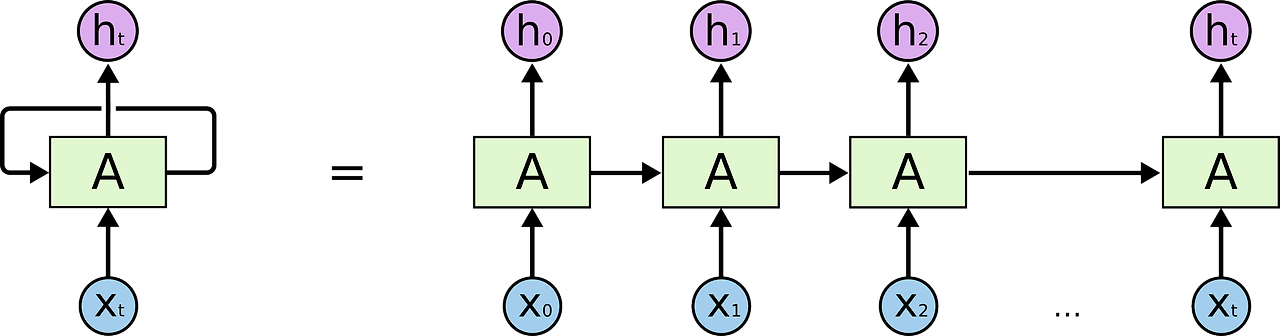

이 그림을 보면, x는 입력값, h는 결과값이다.  

A의 결과는 다시 A로 들어가서 루프를 만들어준다. 이렇기에 현재의 상태가 그 다음 상태에 영향을 미친다. 

이를 잘 표현한 것이 그림의 오른쪽이다.  

이렇게 각 상태에 대해 Y값을 잘 뽑아낼 수 있게 된다.

2.rnn의 한계  

이렇듯, rnn은 정말 멋진 놈이다.  

하지만, rnn은 기억을 가지고 있다는 점이 장점이지만  

장기 기억에는 취약하다는 문제가 있다. 이를 장기 의존 관계(Long-Term-Dependency)라고 한다.  

사람으로 치면 단기 기억력은 좋은데, 장기 기억력은 좋지 않은 것이다.  

이를 해결하기 위한 것이 바로 lstm이다.

3.lstm이란?

lstm은 rnn의 한 종류로, 긴 의존 기간의 문제를 피하기 위해 명시적으로 설계된 모델이다.  

일반적인 rnn은 장기 의존에 관해 문제를 해결하기 어려운데,  

lstm은 게이트 메커니즘을 활용해서 정보를 보존하고 전달함으로서 장기 의존성을 효과적으로 학습할 수 있다.  

또한 rnn은 역전파 과정에서 기울기 소실 문제가 발생할 수 있으나, 긴 시퀀스에서는 역전파 과정 중에 기울기가 지수적으로 감소해 학습이 어려워진다.  

하지만 lstm은 게이트 메커니즘을 사용해 기울기 소실 문제를 완화시킨다.  

(게이트 메커니즘: 게이트는 입력 데이터와 이전 시간 단계에서의 출력을 기반으로 어떤 정보를 유지하고 어떤 정보를 제거할 지 결정한다. 이를 통해 lstm은 입력 데이터 중에서 중요한 정보를 학습하고 장기적인 의존성을 보존할 수 있다.)  

이를 가능하게 하는 것이 바로 cell state이다. 이는 내부 메모리의 일종으로, 이 셀 상태는 시간이 지나도 정보를 계속 유지할 수 있어서 장기 의존성을 학습하는데 도움이 된다.

4.Transformer에 대해

4.1. 개요  

Transformer는 rnn과 lstm보다도 더 직관적이고 성능이 좋은 놈이다. 

Transformer를 이해하기 위해서는 Sequence-to-Sequence(Seq2Seq)와 어텐션을 정리해야 한다.  

Seq2Seq는 정보를 압축하는 인코더 부분과 이를 통해 새로운 데이터를 생성해내는 디코더 부분으로 나눌 수 있다.  

어텐션은 Seq2Seq에서 '이 데이터에 집중해 주세요! 이 부분에 집중해주세요!'라고 하는 수치들을 같이 output으로 넘겨주는 방식이다.  

트렌스포머는 기존의 lstm이 데이터를 병렬처리하기 어렵다는 점을 보완해서  

Sequence를 한번에 넣음으로서 병렬처리가 가능하면서도 어텐션 등의 구조를 통해 어떤 부분이 중요한지를 전달해서 위치 정보를 반영할 수 있게 되었다.  

(어텐션에 대한 자세한 설명과 그림은 밑에서 보기로 하고, 일단은 그림들을 통해 처음부터 개념을 정리해 나가자.)

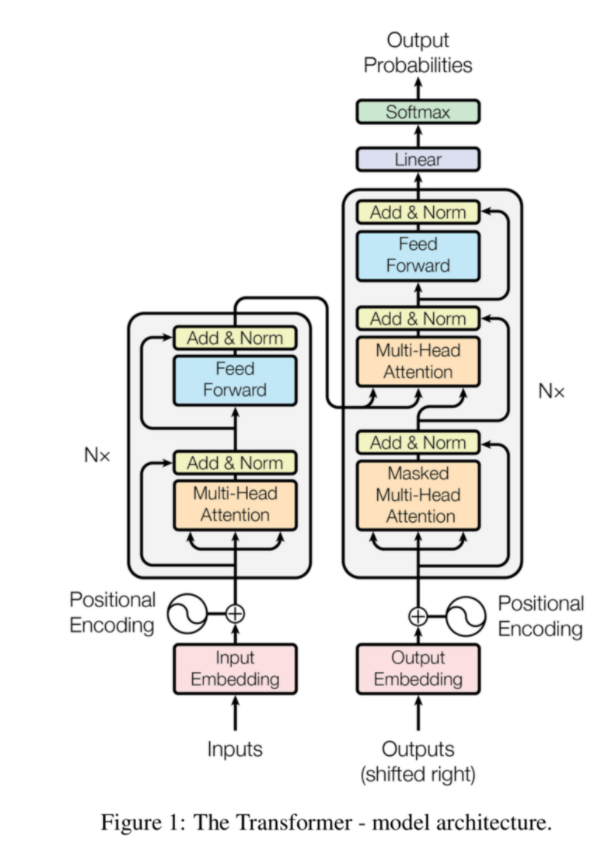

이 그림을 차분하게 보도록 하자.

먼저 Embedding은 데이터를 임의의 N-dimension data로 만들어주는 단계이다.

본격적인 시작은 Positional Encoding이다. 

rnn이나 lstm처럼 순차적으로 데이터를 넣지 않기 때문에 데이터의 위치정보를 전달하는 방법이 필요한데, 이 역활을 담당한다.  

Positional Encoding은 위치 정보와 데이터를 사인함수와 코사인함수의 형태로 만들어서 다음 레이어의 input으로 전달한다.  

쉽게 이야기하면, 임베딩을 할 때 위치정보까지 넣어주자는 내용이다.  


이렇게 데이터가 정리되면, 인코더로 들어간다.  

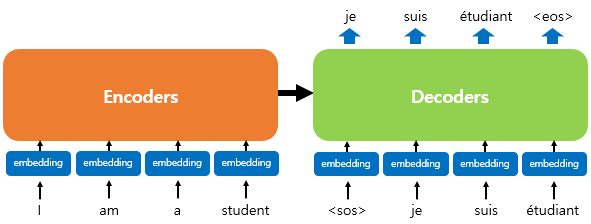


위의 그림은 인코더로부터 정보를 전달받아 디코더가 출력 결과를 만들어 내는 트랜스포머 구조를 보여준다. 

자, 트랜스포머의 내부 구조를 조금씩 확대해가는 방식으로 트랜스포머를 이해해보자.  

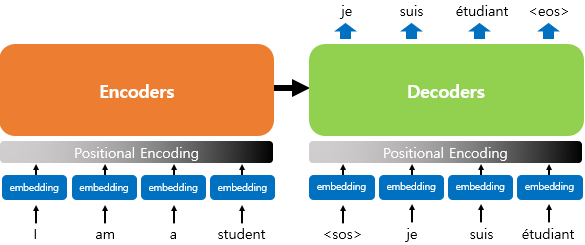

위의 그림은 앞서 설명했던 Positional Encoding이 각 과정에 적용되는 것을 보여준다. 

임베딩 벡터가 인코더의 입력으로 사용되기 전, 포지셔녈 인코딩 값을 더하는 과정을 시각화하면 다음과 같다. 

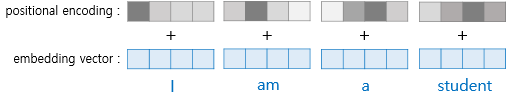

그런데, 여기서 의문이 든다. 포지셔녈 인코딩 값은 대체 뭐길레 위치 정보를 반영해주는 걸까?  

간단하다. 사인함수와 코사인함수의 값을 임베딩 벡터에 더해줌으로서 단어의 순서 정보를 더하는 것이다.


4.2.어텐션에 대해 

주어진 쿼리와 일련의 Key-Value 쌍을 사용해서 가중합을 계산한다.

쿼리는 출력 시퀀스의 각 요소에 대한 정보를 나타내고, 키는 입력 시퀀스의 각 요소에 대한 정보를 나타낸다.  

값은 입력 시퀀스의 각 요소에 대응한다.  

이를 통해 입력 시퀀스의 각 요소가 출력 시퀀스의 각 요소에 얼마나 중요한지 결정하는 메커니즘이다.  

이를 통해 모델은 입력 시퀀스의 특정 부분에 집중하거나, 해당 부분을 더 잘 고려할 수 있다. 



이 인코더에 대한 그림을 보면, 어텐션이 어디에서 이뤄지는지를 보여준다.  

그림에서도 알 수 있듯, 어텐션에도 여러가지 종류가 있다.  

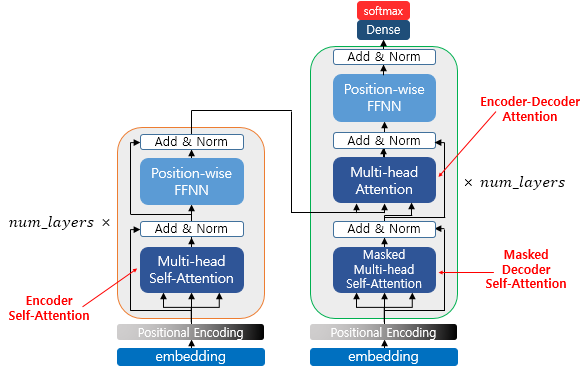


4.3.인코더  



인코더는 입력 시퀀스를 처리하고 그것을 중간 표현으로 변환하는 역할을 한다.  

주어진 입력 시퀀스를 임베딩하여 초기 입력 토큰 벡터를 생한니다  
.
이후, 멀티 헤드 셀프 어텐션 메커니즘을 사용하여 입력 시퀀스의 각 토큰 간의 상관 관계를 한합니  
다.
어텐션 출력에는 피드 포워드 신경망이 적용되어 추가적인 정보가된합됩  
니다.
이러한 과정을 반복하여 인코더는 입력 시퀀스의 각 토큰에 대한 상대적인 중요성을 파악하고, 중간 표현한생성 

4.4.디코더  

디코더는 인코더의 출력인 중간 표현을 사용하여 출력 시퀀스를 생성하는 역할을 한다.  

초기 입력으로는 디코더에게 시작 토큰과 인코더의 출력인 중간 표현이 주어집니다  
.
디코더는 멀티 헤드 셀프 어텐션을 사용하여 출력 시퀀스의 각 토큰 간의 상관 관계를 한다니다. 이 때, 쿼리(Query)는 이전 디코더의 출력이 된됩니  
다.
또한, 인코더-디코더 어텐션을 사용하여 입력 시퀀스와 출력 시퀀스 간의 상관 관계를한다합니다. 이를 통해 디코더는 입력 시퀀스의 정보를 기반으로 출력 시퀀스를한다합  
니다.
디코더는 마지막에 출력 시퀀스의 각 토큰에 대한 확률 분포를 생성하고, 이를 사용하여 최종적인 출력한다정  


이렇게 인코더와 디코더는 입력과 출력 시퀀스 간의 관계를 파악하고 이를 사용해서 번역, 요약, 질의 응답 등의 자연어 처리 작업을 수행한다.합니다.합니다.

